# DATA process

In [ ]:
# prompt: show the information of all csv file in directory "Article urgent Azza/inputMatrix" and "Article urgent Azza/output"

import os

input_path = "data/inputMatrix"
output_path = "data/output"

def get_csv_info(path):
  csv_files = []
  for filename in os.listdir(path):
    if filename.endswith(".csv"):
      file_path = os.path.join(path, filename)
      file_size = os.path.getsize(file_path)
      csv_files.append({
          "filename": filename,
          "size": file_size
      })
  return csv_files

input_csv_info = get_csv_info(input_path)
output_csv_info = get_csv_info(output_path)

print("Input CSV files:")
for csv in input_csv_info:
  print(f"- {csv['filename']} ({csv['size']} bytes)")

print("\nOutput CSV files:")
for csv in output_csv_info:
  print(f"- {csv['filename']} ({csv['size']} bytes)")


Input CSV files:
- Combined_Clean_LLML_Acc_cycles_col1.csv (37121385 bytes)
- Combined_Clean_RLML_Acc_cycles_col1.csv (37096649 bytes)
- Combined_Clean_LLML_Acc_cycles_col2.csv (36721328 bytes)
- Combined_Clean_RLML_Acc_cycles_col2.csv (36678046 bytes)
- Combined_Clean_LLML_Acc_cycles_col3.csv (36313740 bytes)
- Combined_Clean_RLML_Acc_cycles_col3.csv (36284660 bytes)

Output CSV files:
- Combined_StepL_col1.csv (36674022 bytes)
- Combined_StepL_col2.csv (37958384 bytes)
- Combined_StepL_col3.csv (39182553 bytes)
- Combined_StepR_col1.csv (36673603 bytes)
- Combined_StepR_col2.csv (37957468 bytes)
- Combined_StepR_col3.csv (39179181 bytes)


In [ ]:
# prompt: show the information about the columns of all csv file in directory "Article urgent Azza/inputMatrix" and "Article urgent Azza/output"

import pandas as pd

def get_column_info(path):
  column_info = {}
  for filename in os.listdir(path):
    if filename.endswith(".csv"):
      file_path = os.path.join(path, filename)
      df = pd.read_csv(file_path)
      column_info[filename] = {
          "columns": list(df.columns)
      }
  return column_info

input_column_info = get_column_info(input_path)
output_column_info = get_column_info(output_path)

print("Input CSV files:")
for filename, info in input_column_info.items():
  print(f"- {filename}:")
  for column in info["columns"]:
    print(f"  - {column}")

print("\nOutput CSV files:")
for filename, info in output_column_info.items():
  print(f"- {filename}:")
  for column in info["columns"]:
    print(f"  - {column}")


In [ ]:
import pandas as pd

df = pd.read_csv("data/inputMatrix/Combined_Clean_LLML_Acc_cycles_col1.csv")

In [ ]:
df.head()

,-0.0438710743860621,0.258895259824195,0.590313521612907,0.540281937507558,0.215723083227479,1.78874363980909,3.54108427859902,-0.722198630084651,0.621220533753972,-1.24268285696811,...,0.459512996742843,-0.749178083579655,-0.712039820693649,-0.517185605497553,-1.32641530278369,-1.11673635398285,-0.302779505390744,-0.290091242583842,-3.07034477667973,-2.32654491137908
0,-0.063624,0.226566,0.598095,0.528002,0.155712,1.795158,3.562785,-0.718653,0.591097,-1.249848,...,0.537481,-0.671654,-0.637093,-0.440809,-1.249598,-1.044187,-0.247121,-0.214545,-3.043863,-2.261791
1,-0.084255,0.192366,0.605993,0.517100,0.096347,1.797661,3.572915,-0.712841,0.557328,-1.254973,...,0.614105,-0.595020,-0.562554,-0.365037,-1.172838,-0.971664,-0.191785,-0.139869,-3.016062,-2.196448
2,-0.105775,0.156468,0.613982,0.507618,0.037979,1.796085,3.571140,-0.704621,0.519596,-1.258076,...,0.689240,-0.519423,-0.488570,-0.289982,-1.096216,-0.899254,-0.136866,-0.066196,-2.986946,-2.130527
3,-0.128101,0.118959,0.622039,0.499629,-0.019069,1.790690,3.558408,-0.694039,0.478005,-1.259239,...,0.762751,-0.444996,-0.415206,-0.215747,-1.019831,-0.827067,-0.082466,0.006299,-2.956412,-2.064040
4,-0.151160,0.080110,0.630130,0.493081,-0.074501,1.781439,3.534676,-0.681060,0.432373,-1.258664,...,0.834795,-0.371667,-0.342523,-0.142295,-0.943730,-0.755164,-0.028589,0.077692,-2.924721,-1.997111


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 2050 entries, -0.0438710743860621 to -2.32654491137908
dtypes: float64(2050)
memory usage: 15.6 MB


In [ ]:
df = pd.read_csv("data/output/Combined_StepL_col1.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 2050 entries, 0.336412538573073 to 0.309858161462259
dtypes: float64(2050)
memory usage: 15.6 MB


In [ ]:
df.head()

,0.336412538573073,0.329743768336083,0.24523690177016,0.246231086261705,0.265603297594591,0.223497414239054,0.261417506399289,0.27548407019455,0.250191765787001,0.31142564607987,...,0.272398828778863,0.302170965090999,0.294027329646273,0.291065365469452,0.29620097485139,0.284479421474211,0.295141971689803,0.28477919948587,0.333375913743219,0.309858161462259
0,0.336427,0.329919,0.245139,0.246075,0.265576,0.223369,0.261027,0.275426,0.250220,0.311545,...,0.272273,0.302096,0.293963,0.290981,0.296143,0.284461,0.295128,0.284682,0.333518,0.309857
1,0.336436,0.330094,0.245048,0.245924,0.265553,0.223246,0.260646,0.275365,0.250248,0.311661,...,0.272148,0.302022,0.293901,0.290898,0.296085,0.284443,0.295114,0.284584,0.333657,0.309855
2,0.336440,0.330269,0.244963,0.245779,0.265535,0.223130,0.260277,0.275303,0.250275,0.311774,...,0.272027,0.301949,0.293840,0.290817,0.296028,0.284428,0.295101,0.284486,0.333793,0.309854
3,0.336439,0.330445,0.244885,0.245641,0.265522,0.223022,0.259920,0.275240,0.250303,0.311884,...,0.271908,0.301879,0.293781,0.290738,0.295972,0.284414,0.295087,0.284386,0.333925,0.309853
4,0.336435,0.330621,0.244814,0.245508,0.265515,0.222921,0.259576,0.275176,0.250333,0.311990,...,0.271792,0.301809,0.293724,0.290660,0.295917,0.284402,0.295074,0.284286,0.334054,0.309853


In [ ]:
# prompt: I want to combine the data in the files Combined_Clean_LLML_Acc_cycles_col1.csv,  Combined_Clean_LLML_Acc_cycles_col2.csv,  Combined_Clean_LLML_Acc_cycles_col3.csv
# by making them column in one csv file, the first file which correspond to first colum named LLML_ACC_X, the second LLML_ACC_Y, and tyhe third LLML_ACC_Z,
# note that the data in each file is a matrix without any column name,

import os
import pandas as pd

input_path = "data/inputMatrix"

def combine_csv_files(path):
  combined_df = pd.DataFrame()
  for filename in os.listdir(path):
    if filename.endswith(".csv"):
      file_path = os.path.join(path, filename)
      df = pd.read_csv(file_path, header=None)
      combined_df = pd.concat([combined_df, df], axis=1)
  combined_df.columns = ["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]
  return combined_df

combined_df = combine_csv_files(input_path)

# Save the combined DataFrame to a new CSV file
output_path = "data/output"
combined_df.to_csv(os.path.join(output_path, "Combined_LLML_Acc_cycles.csv"), index=False)



ValueError: Length mismatch: Expected axis has 12300 elements, new values have 3 elements

In [ ]:
# prompt: read the Combined_Clean_LLML_Acc_cycles_col1.csv,  Combined_Clean_LLML_Acc_cycles_col2.csv,  Combined_Clean_LLML_Acc_cycles_col3.csv
# as numpy array then flatten each one

import numpy as np

# Read the CSV files as numpy arrays
col1_array = np.genfromtxt("data/inputMatrix/Combined_Clean_LLML_Acc_cycles_col1.csv", delimiter=",")
col2_array = np.genfromtxt("data/inputMatrix/Combined_Clean_LLML_Acc_cycles_col2.csv", delimiter=",")
col3_array = np.genfromtxt("data/inputMatrix/Combined_Clean_LLML_Acc_cycles_col3.csv", delimiter=",")
step_x_L_array = np.genfromtxt("data/output/Combined_StepL_col1.csv", delimiter=",")
step_y_L_array = np.genfromtxt("data/output/Combined_StepL_col2.csv", delimiter=",")
step_z_L_array = np.genfromtxt("data/output/Combined_StepL_col3.csv", delimiter=",")

# Flatten each array
flattened_col1 = col1_array.flatten()
flattened_col2 = col2_array.flatten()
flattened_col3 = col3_array.flatten()
flattened_step_x_L = step_x_L_array.flatten()
flattened_step_y_L = step_y_L_array.flatten()
flattened_step_z_L = step_z_L_array.flatten()
# Print the flattened arrays
print("Flattened col1 array:", flattened_col1)
print("Flattened col2 array:", flattened_col2)
print("Flattened col3 array:", flattened_col3)


Flattened col1 array: [-0.04387107  0.25889526  0.59031352 ... -0.00661522 -2.32654491
 -0.81696315]
Flattened col2 array: [ 3.66115455  0.20011303  1.5977273  ... 18.82838448 21.21928265
 19.97833089]
Flattened col3 array: [ 1.44533285  1.64282821  2.03232264 ... -0.23966951 -0.221055
 -1.09521805]


In [ ]:
print("Flattened col1 array:", flattened_col1.shape)
print("Flattened col2 array:", flattened_col2.shape)
print("Flattened col3 array:", flattened_col3.shape)

Flattened col1 array: (2050000,)
Flattened col2 array: (2050000,)
Flattened col3 array: (2050000,)


In [ ]:
# prompt: create a new dataframe, with three colum using flattened_col1
# flattened_col2
# flattened_col3
# where the flattened_col1 represent a column named LLML_ACC_X,  flattened_col2 represent a column named LLML_ACC_Y and flattened_col3 represent LLML_ACC_Z

import pandas as pd

# Create a new DataFrame
Lx_step_frame = pd.DataFrame({
    "LLML_ACC_X": flattened_col1,
    "LLML_ACC_Y": flattened_col2,
    "LLML_ACC_Z": flattened_col3,
    "StepL_X": flattened_step_x_L

})

Ly_step_frame = pd.DataFrame({
    "LLML_ACC_X": flattened_col1,
    "LLML_ACC_Y": flattened_col2,
    "LLML_ACC_Z": flattened_col3,
    "StepL_Y": flattened_step_y_L
})

Lz_step_frame = pd.DataFrame({
    "LLML_ACC_X": flattened_col1,
    "LLML_ACC_Y": flattened_col2,
    "LLML_ACC_Z": flattened_col3,
    "StepL_Z": flattened_step_z_L

})



# Print the new DataFrame
print(Lx_step_frame.head())
print(Lx_step_frame.info())
print(Ly_step_frame.head())
print(Ly_step_frame.info())
print(Lz_step_frame.head())
print(Lz_step_frame.info())


   LLML_ACC_X  LLML_ACC_Y  LLML_ACC_Z   StepL_X
0   -0.043871    3.661155    1.445333  0.336413
1    0.258895    0.200113    1.642828  0.329744
2    0.590314    1.597727    2.032323  0.245237
3    0.540282   -0.688441    1.686990  0.246231
4    0.215723    2.892546    1.334934  0.265603
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050000 entries, 0 to 2049999
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   LLML_ACC_X  float64
 1   LLML_ACC_Y  float64
 2   LLML_ACC_Z  float64
 3   StepL_X     float64
dtypes: float64(4)
memory usage: 62.6 MB
None
   LLML_ACC_X  LLML_ACC_Y  LLML_ACC_Z   StepL_Y
0   -0.043871    3.661155    1.445333 -0.592893
1    0.258895    0.200113    1.642828 -0.644064
2    0.590314    1.597727    2.032323 -0.602251
3    0.540282   -0.688441    1.686990 -0.596200
4    0.215723    2.892546    1.334934 -0.633873
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050000 entries, 0 to 2049999
Data columns (total 4 columns):
 #  

In [ ]:
# prompt: save the three dataframes to files

Lx_step_frame.to_csv("data/output/Combined_StepL_X.csv", index=False)
Ly_step_frame.to_csv("data/output/Combined_StepL_Y.csv", index=False)
Lz_step_frame.to_csv("data/output/Combined_StepL_Z.csv", index=False)


In [ ]:
col1_array = np.genfromtxt("data/inputMatrix/Combined_Clean_RLML_Acc_cycles_col1.csv", delimiter=",")
col2_array = np.genfromtxt("data/inputMatrix/Combined_Clean_RLML_Acc_cycles_col2.csv", delimiter=",")
col3_array = np.genfromtxt("data/inputMatrix/Combined_Clean_RLML_Acc_cycles_col3.csv", delimiter=",")
step_x_R_array = np.genfromtxt("data/output/Combined_StepR_col1.csv", delimiter=",")
step_y_R_array = np.genfromtxt("data/output/Combined_StepR_col2.csv", delimiter=",")
step_z_R_array = np.genfromtxt("data/output/Combined_StepR_col3.csv", delimiter=",")

# Flatten each array
flattened_col1 = col1_array.flatten()
flattened_col2 = col2_array.flatten()
flattened_col3 = col3_array.flatten()
flattened_step_x_R = step_x_R_array.flatten()
flattened_step_y_R = step_y_R_array.flatten()
flattened_step_z_R = step_z_R_array.flatten()


Rx_step_frame = pd.DataFrame({
    "RLML_ACC_X": flattened_col1,
    "RLML_ACC_Y": flattened_col2,
    "RLML_ACC_Z": flattened_col3,
    "StepR_X": flattened_step_x_R

})

Ry_step_frame = pd.DataFrame({
    "RLML_ACC_X": flattened_col1,
    "RLML_ACC_Y": flattened_col2,
    "RLML_ACC_Z": flattened_col3,
    "StepR_Y": flattened_step_y_R
})

Rz_step_frame = pd.DataFrame({
    "RLML_ACC_X": flattened_col1,
    "RLML_ACC_Y": flattened_col2,
    "RLML_ACC_Z": flattened_col3,
    "StepR_Z": flattened_step_z_R

})

Rx_step_frame.to_csv("data/output/Combined_StepR_X.csv", index=False)
Ry_step_frame.to_csv("data/output/Combined_StepR_Y.csv", index=False)
Rz_step_frame.to_csv("data/output/Combined_StepR_Z.csv", index=False)


In [ ]:
# prompt: write a simple random forst model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv("data/output/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a random forest model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("R^2 score:", score)


# Modeling

### Imports

In [3]:
!pip install catboost
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install numpy


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DEcision Tree


### Predicting on Left

In [6]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Load the data
data = pd.read_csv("data/output/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step LEFT on axis X:", score)
y_test_L_X = y_test
pred_L_X_DT = model.predict(X_test)
L_X_DT_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_DT))
L_X_DT_mae = mean_absolute_error(y_test_L_X, pred_L_X_DT)
print("RMSE for predicting step LEFT on axis X:", L_X_DT_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_DT_mae)


MSE for predicting step LEFT on axis X: 0.04418424735545157
RMSE for predicting step LEFT on axis X: 0.04986421639207391
MAE for predicting step LEFT on axis X: 0.03409116048476424


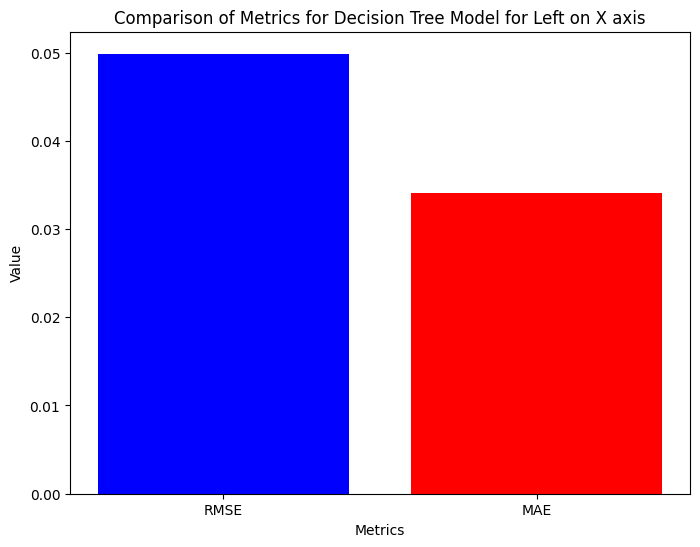

In [7]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_DT_rmse,
    'MAE': L_X_DT_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Decision Tree Model for Left on X axis')

# Show plot
plt.savefig('Decision_Tree_Metrics_Bar_Plot_LEFT_X.png')
plt.show()

In [8]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_Y", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step LEFT on axis Y:", score)
y_test_L_Y = y_test
pred_L_Y_DT = model.predict(X_test)
L_Y_DT_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_DT))
L_Y_DT_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_DT)
print("RMSE for predicting step LEFT on axis Y:", L_Y_DT_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_DT_mae)

MSE for predicting step LEFT on axis Y: 0.7604092274646477
RMSE for predicting step LEFT on axis Y: 0.22137058132758744
MAE for predicting step LEFT on axis Y: 0.17136476382425858


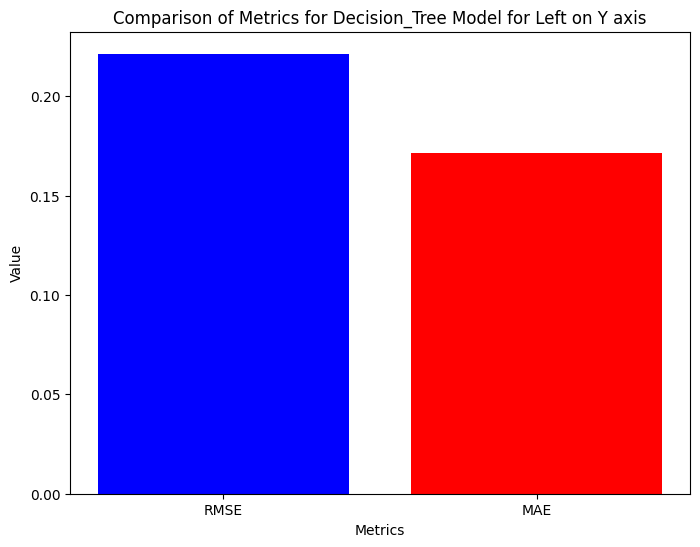

In [9]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_DT_rmse,
    'MAE': L_Y_DT_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Decision_Tree Model for Left on Y axis')

# Show plot
plt.savefig('Decision_Tree_Metrics_Bar_Plot_LEFT_Y.png')
plt.show()

In [10]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_Z", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
y_test_L_Z = y_test
pred_L_Z_DT = model.predict(X_test)
L_Z_DT_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_DT))
L_Z_DT_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_DT)
print("RMSE for predicting step LEFT on axis Z:", L_Z_DT_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_DT_mae)

MSE for predicting step L on axis Z: 0.7876873291693943
RMSE for predicting step LEFT on axis Z: 0.04683863803412423
MAE for predicting step LEFT on axis Z: 0.034665747631532746


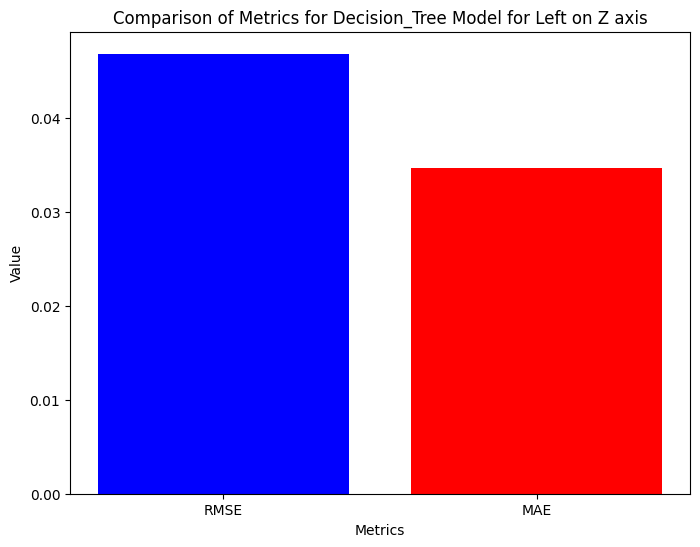

In [11]:
metrics = {
    #'MSE': score,
    'RMSE': L_Z_DT_rmse,
    'MAE': L_Z_DT_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Decision_Tree Model for Left on Z axis')

# Show plot
plt.savefig('Decision_Tree_Metrics_Bar_Plot_LEFT_Z.png')
plt.show()

### Predicting on Right

In [12]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Load the data
data = pd.read_csv("data/output/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
y_test_R_X = y_test
pred_R_X_DT = model.predict(X_test)
R_X_DT_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_DT))
R_X_DT_mae = mean_absolute_error(y_test_R_X, pred_R_X_DT)
print("RMSE for predicting step RIGHT on axis X:", R_X_DT_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_DT_mae)

MSE for predicting step R on axis X: 0.042735679096703394
RMSE for predicting step RIGHT on axis X: 0.0498151901491646
MAE for predicting step RIGHT on axis X: 0.03405711409146049


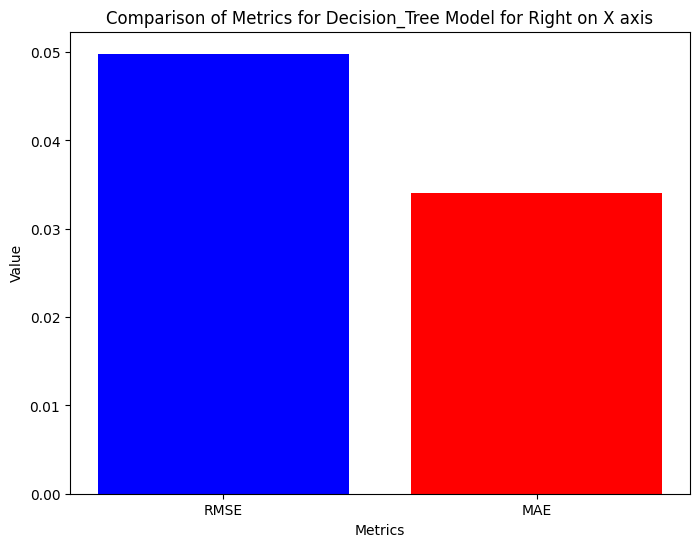

In [13]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_DT_rmse,
    'MAE': R_X_DT_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Decision_Tree Model for Right on X axis')

# Show plot
plt.savefig('Decision_Tree_Metrics_Bar_Plot_Right_x.png')
plt.show()

In [14]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
y_test_R_Y = y_test
pred_R_Y_DT = model.predict(X_test)
R_Y_DT_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_DT))
R_Y_DT_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_DT)
print("RMSE for predicting step RIGHT on axis Y:", R_Y_DT_rmse)
print("MAE for predicting step RIGHT on axis Y:", R_Y_DT_mae)


MSE for predicting step R on axis Y: 0.7616203661437234
RMSE for predicting step RIGHT on axis Y: 0.2207621300669597
MAE for predicting step RIGHT on axis Y: 0.17189584230268073


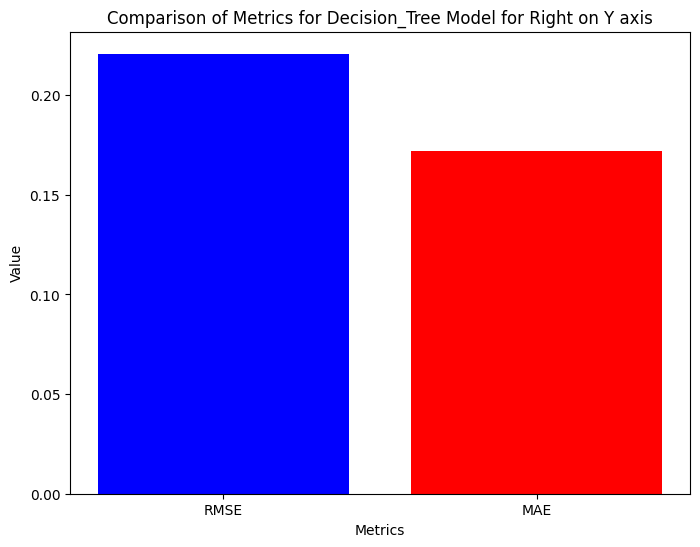

In [15]:
metrics = {
    #'MSE': score,
    'RMSE': R_Y_DT_rmse,
    'MAE': R_Y_DT_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Decision_Tree Model for Right on Y axis')

# Show plot
plt.savefig('Decision_Tree_Metrics_Bar_Plot_Right_Y.png')
plt.show()

In [16]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
y_test_R_Z = y_test
pred_R_Z_DT = model.predict(X_test)
R_Z_DT_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_DT))
R_Z_DT_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_DT)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_DT_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_DT_mae)


MSE for predicting step R on axis Z: 0.8138763799676155
RMSE for predicting step RIGHT on axis Z: 0.043867061704135214
MAE for predicting step RIGHT on axis Z: 0.03221215716346791


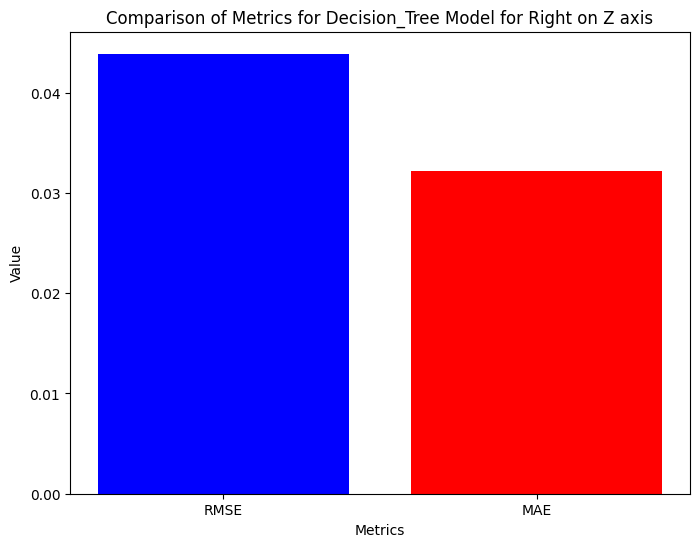

In [17]:
metrics = {
    #'MSE': score,
    'RMSE': R_Z_DT_rmse,
    'MAE': R_Z_DT_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Decision_Tree Model for Right on Z axis')

# Show plot
plt.savefig('Decision_Tree_Metrics_Bar_Plot_Right_Z.png')
plt.show()

## Gradiant Boosting


### Predicting on Left

In [18]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = GradientBoostingRegressor(n_estimators=10)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
y_test_L_X = y_test
pred_L_X_GB = model.predict(X_test)
L_X_GB_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_GB))
L_X_GB_mae = mean_absolute_error(y_test_L_X, pred_L_X_GB)
print("RMSE for predicting step LEFT on axis X:", L_X_GB_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_GB_mae)


MSE for predicting step L on axis X: 0.04898281860186171
RMSE for predicting step LEFT on axis X: 0.049586131018628736
MAE for predicting step LEFT on axis X: 0.03379135815480904


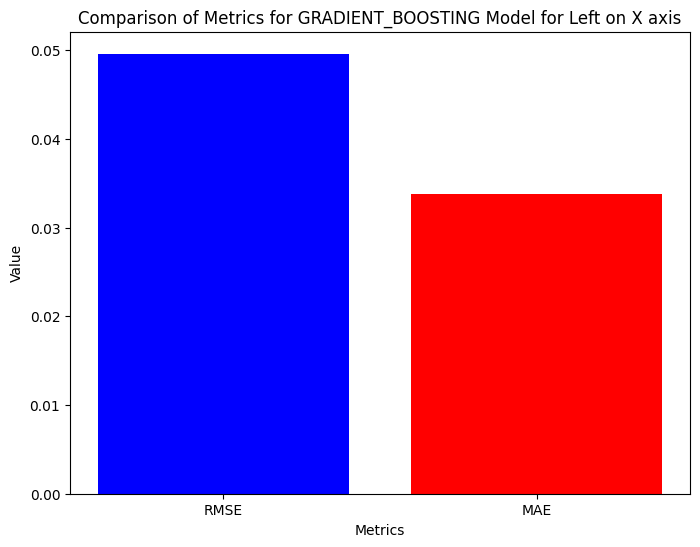

In [19]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_GB_rmse,
    'MAE': L_X_GB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for GRADIENT_BOOSTING Model for Left on X axis')

# Show plot
plt.savefig('GRADIENT_BOOSTING_Metrics_Bar_Plot_Left_X.png')
plt.show()

In [20]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = GradientBoostingRegressor(n_estimators=10)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
y_test_L_Y = y_test
pred_L_Y_GB = model.predict(X_test)
L_Y_GB_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_GB))
L_Y_GB_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_GB)
print("RMSE for predicting step LEFT on axis Y:", L_Y_GB_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_GB_mae)


MSE for predicting step L on axis Y: 0.6879646646957831
RMSE for predicting step LEFT on axis Y: 0.2528335439114205
MAE for predicting step LEFT on axis Y: 0.2171336977669405


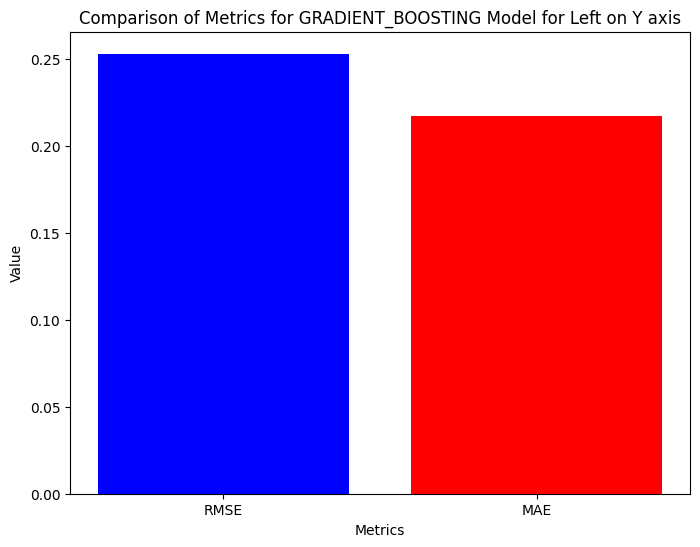

In [21]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_GB_rmse,
    'MAE': L_Y_GB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for GRADIENT_BOOSTING Model for Left on Y axis')

# Show plot
plt.savefig('GRADIENT_BOOSTING_Metrics_Bar_Plot_Left_Y.png')
plt.show()

In [22]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = GradientBoostingRegressor(n_estimators=10)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
y_test_L_Z = y_test
pred_L_Z_GB = model.predict(X_test)
L_Z_GB_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_GB))
L_Z_GB_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_GB)
print("RMSE for predicting step LEFT on axis Z:", L_Z_GB_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_GB_mae)


MSE for predicting step L on axis Z: 0.7180944123087108
RMSE for predicting step LEFT on axis Z: 0.053982409197980384
MAE for predicting step LEFT on axis Z: 0.042291915395372574


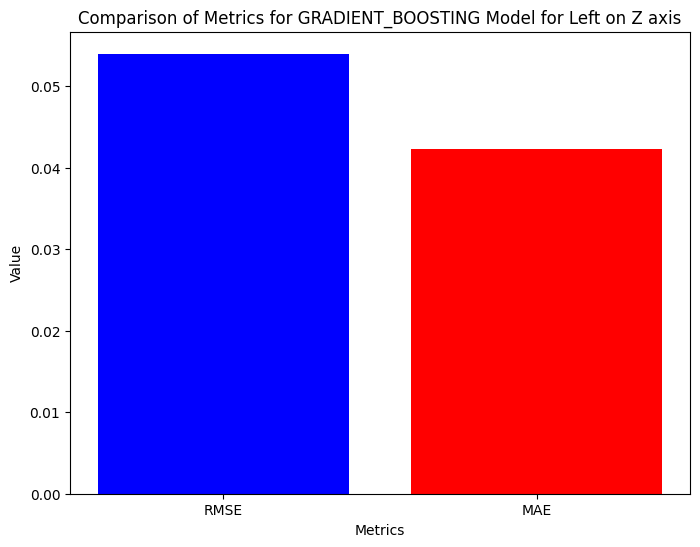

In [23]:
metrics = {
    #'MSE': score,
    'RMSE': L_Z_GB_rmse,
    'MAE': L_Z_GB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for GRADIENT_BOOSTING Model for Left on Z axis')

# Show plot
plt.savefig('GRADIENT_BOOSTING_Metrics_Bar_Plot_Left_Z.png')
plt.show()

### Predicting on Right

In [24]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = GradientBoostingRegressor(n_estimators=10)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
y_test_R_X = y_test
pred_R_X_GB = model.predict(X_test)
R_X_GB_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_GB))
R_X_GB_mae = mean_absolute_error(y_test_R_X, pred_R_X_GB)
print("RMSE for predicting step RIGHT on axis X:", R_X_GB_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_GB_mae)

MSE for predicting step R on axis X: 0.04450769463278248
RMSE for predicting step RIGHT on axis X: 0.04975976569076734
MAE for predicting step RIGHT on axis X: 0.034064938360990525


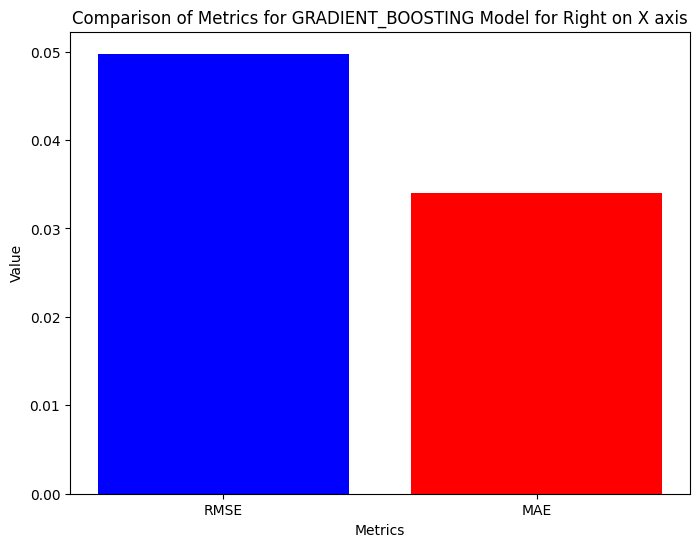

In [25]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_GB_rmse,
    'MAE': R_X_GB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for GRADIENT_BOOSTING Model for Right on X axis')

# Show plot
plt.savefig('GRADIENT_BOOSTING_Metrics_Bar_Plot_Right_X.png')
plt.show()

In [26]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = GradientBoostingRegressor(n_estimators=10)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
y_test_R_Y = y_test
pred_R_Y_GB = model.predict(X_test)
R_Y_GB_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_GB))
R_Y_GB_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_GB)
print("RMSE for predicting step RIGHT on axis Y:", R_Y_GB_rmse)
print("MAE for predicting step RIGHT on axis Y:", R_Y_GB_mae)

MSE for predicting step R on axis Y: 0.6898981502809114
RMSE for predicting step RIGHT on axis Y: 0.25160358814713
MAE for predicting step RIGHT on axis Y: 0.21715336643929592


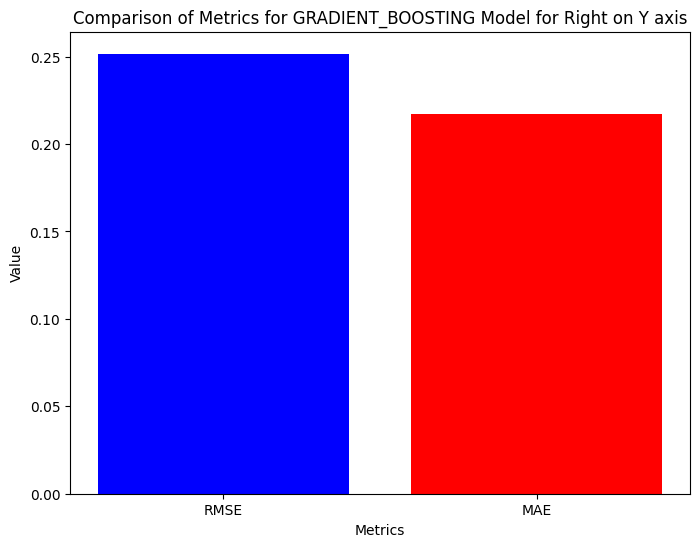

In [27]:
metrics = {
    #'MSE': score,
    'RMSE': R_Y_GB_rmse,
    'MAE': R_Y_GB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for GRADIENT_BOOSTING Model for Right on Y axis')

# Show plot
plt.savefig('GRADIENT_BOOSTING_Metrics_Bar_Plot_Right_Y.png')
plt.show()

In [28]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = GradientBoostingRegressor(n_estimators=10)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
y_test_Z_Z = y_test
pred_R_Z_GB = model.predict(X_test)
R_Z_GB_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_GB))
R_Z_GB_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_GB)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_GB_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_GB_mae)

MSE for predicting step R on axis Z: 0.7316643154598375
RMSE for predicting step RIGHT on axis Z: 0.11759346554153585
MAE for predicting step RIGHT on axis Z: 0.09605103960369342


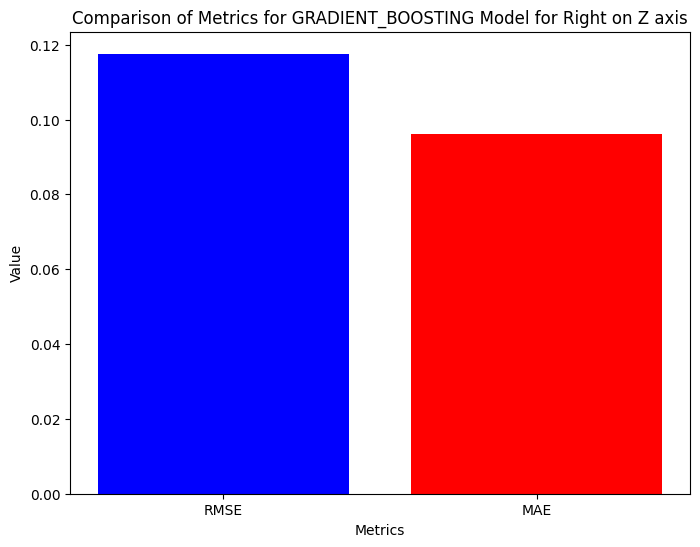

In [29]:
metrics = {
    #'MSE': score,
    'RMSE': R_Z_GB_rmse,
    'MAE': R_Z_GB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for GRADIENT_BOOSTING Model for Right on Z axis')

# Show plot
plt.savefig('GRADIENT_BOOSTING_Metrics_Bar_Plot_Right_Z.png')
plt.show()

## Elastic Net Regression


### Predicting on Left

In [36]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

model = ElasticNet(alpha=0.1, l1_ratio=0.5)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
pred_L_X_ENR = model.predict(X_test)
L_X_ENR_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_ENR))
L_X_ENR_mae = mean_absolute_error(y_test_L_X, pred_L_X_ENR)
print("RMSE for predicting step LEFT on axis X:", L_X_ENR_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_ENR_mae)


MSE for predicting step L on axis X: -1.1316617207768331e-06
RMSE for predicting step LEFT on axis X: 0.05089687513869872
MAE for predicting step LEFT on axis X: 0.03494450915706398


In [37]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_ENR = model.predict(X_test)
L_Y_ENR_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_ENR))
L_Y_ENR_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_ENR)
print("RMSE for predicting step LEFT on axis Y:", L_Y_ENR_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_ENR_mae)


MSE for predicting step L on axis Y: 0.5660505551499591
RMSE for predicting step LEFT on axis Y: 0.5612827820139851
MAE for predicting step LEFT on axis Y: 0.46436316920166815


In [38]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_ENR = model.predict(X_test)
L_Z_ENR_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_ENR))
L_Z_ENR_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_ENR)
print("RMSE for predicting step LEFT on axis Z:", L_Z_ENR_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_ENR_mae)


MSE for predicting step L on axis Z: 0.24347592261925677
RMSE for predicting step LEFT on axis Z: 0.11013781316334142
MAE for predicting step LEFT on axis Z: 0.08916142800161428


### Predicting on Right

In [39]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
pred_R_X_ENR = model.predict(X_test)
R_X_ENR_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_ENR))
R_X_ENR_mae = mean_absolute_error(y_test_R_X, pred_R_X_ENR)
print("RMSE for predicting step RIGHT on axis X:", R_X_ENR_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_ENR_mae)


MSE for predicting step R on axis X: -8.831629649819206e-09
RMSE for predicting step RIGHT on axis X: 0.050857620404570765
MAE for predicting step RIGHT on axis X: 0.03484209568829603


In [40]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
pred_R_Y_ENR = model.predict(X_test)
R_Y_ENR_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_ENR))
R_Y_ENR_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_ENR)
print("RMSE for predicting step RIGHT on axis Y:", R_Y_ENR_rmse)
print("MAE for predicting step RIGHT on axis Y:", R_Y_ENR_mae)


MSE for predicting step R on axis Y: 0.5641565612237229
RMSE for predicting step RIGHT on axis Y: 0.5605226043549397
MAE for predicting step RIGHT on axis Y: 0.4635218511919611


In [41]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_ENR = model.predict(X_test)
R_Z_ENR_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_ENR))
R_Z_ENR_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_ENR)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_ENR_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_ENR_mae)


MSE for predicting step R on axis Z: 0.263305315289752
RMSE for predicting step RIGHT on axis Z: 0.11081896485370712
MAE for predicting step RIGHT on axis Z: 0.08961755682148193


## LASSO

### Predicting on Left

In [42]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
pred_L_X_LASSO = model.predict(X_test)
L_X_LASSO_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_LASSO))
L_X_LASSO_mae = mean_absolute_error(y_test_L_X, pred_L_X_LASSO)
print("RMSE for predicting step LEFT on axis X:", L_X_LASSO_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_LASSO_mae)


MSE for predicting step L on axis X: -1.750297404568002e-06
RMSE for predicting step LEFT on axis X: 0.050896856165645474
MAE for predicting step LEFT on axis X: 0.03495050628840187


In [43]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_LASSO = model.predict(X_test)
L_Y_LASSO_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_LASSO))
L_Y_LASSO_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_LASSO)
print("RMSE for predicting step LEFT on axis Y:", L_Y_LASSO_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_LASSO_mae)


MSE for predicting step L on axis Y: 0.5480843957646602
RMSE for predicting step LEFT on axis Y: 0.556856445343114
MAE for predicting step LEFT on axis Y: 0.46078875617174686


In [44]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_LASSO = model.predict(X_test)
L_Z_LASSO_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_LASSO))
L_Z_LASSO_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_LASSO)
print("RMSE for predicting step LEFT on axis Z:", L_Z_LASSO_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_LASSO_mae)


MSE for predicting step L on axis Z: 0.21937344578199502
RMSE for predicting step LEFT on axis Z: 0.10720813305445574
MAE for predicting step LEFT on axis Z: 0.08687323111441883


### Predicting on Right

In [45]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
pred_R_X_LASSO = model.predict(X_test)
R_X_LASSO_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_LASSO))
R_X_LASSO_mae = mean_absolute_error(y_test_R_X, pred_R_X_LASSO)
print("RMSE for predicting step RIGHT on axis X:", R_X_LASSO_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_LASSO_mae)


MSE for predicting step R on axis X: -4.684761756301725e-07
RMSE for predicting step RIGHT on axis X: 0.050857614780369625
MAE for predicting step RIGHT on axis X: 0.03484059175869907


In [46]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
pred_R_Y_LASSO = model.predict(X_test)
R_Y_LASSO_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_LASSO))
R_Y_LASSO_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_LASSO)
print("RMSE for predicting step RIGHT on axis Y:", R_Y_LASSO_rmse)
print("MAE for predicting step RIGHT on axis Y:", R_Y_LASSO_mae)


MSE for predicting step R on axis Y: 0.5495954807399004
RMSE for predicting step RIGHT on axis Y: 0.5579377601071057
MAE for predicting step RIGHT on axis Y: 0.4618538532156786


In [47]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_LASSO = model.predict(X_test)
R_Z_LASSO_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_LASSO))
R_Z_LASSO_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_LASSO)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_LASSO_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_LASSO_mae)

MSE for predicting step R on axis Z: 0.239951167637109
RMSE for predicting step RIGHT on axis Z: 0.10781529088410276
MAE for predicting step RIGHT on axis Z: 0.08733123798135647


## Linear Regression

### Predicting on Left

In [30]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
pred_L_X_LR = model.predict(X_test)
L_X_LR_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_LR))
L_X_LR_mae = mean_absolute_error(y_test_L_X, pred_L_X_LR)
print("RMSE for predicting step LEFT on axis X:", L_X_LR_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_LR_mae)

MSE for predicting step L on axis X: 0.017451191387361176
RMSE for predicting step LEFT on axis X: 0.05129431828048223
MAE for predicting step LEFT on axis X: 0.03540072487257285


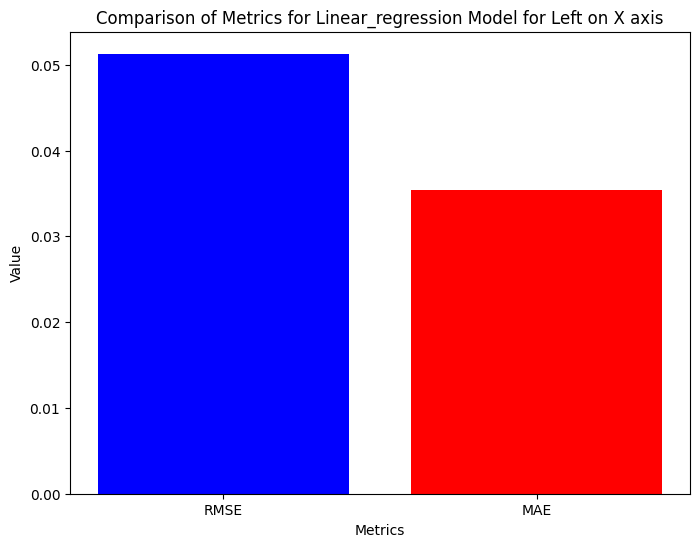

In [31]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_LR_rmse,
    'MAE': L_X_LR_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Linear_regression Model for Left on X axis')

# Show plot
plt.savefig('Linear_regression_Metrics_Bar_Plot_Left_X.png')
plt.show()

In [32]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_LR = model.predict(X_test)
L_Y_LR_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_LR))
L_Y_LR_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_LR)
print("RMSE for predicting step LEFT on axis Y:", L_Y_LR_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_LR_mae)

MSE for predicting step L on axis Y: 0.5707825822524916
RMSE for predicting step LEFT on axis Y: 0.567410398456852
MAE for predicting step LEFT on axis Y: 0.4688127296499198


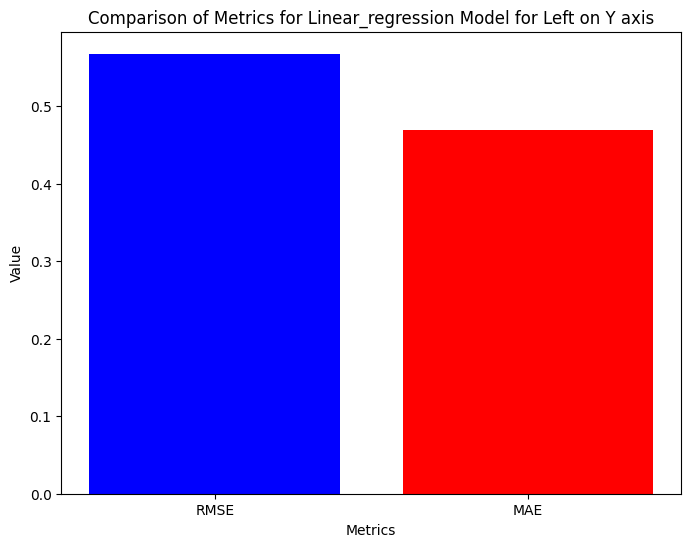

In [33]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_LR_rmse,
    'MAE': L_Y_LR_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Linear_regression Model for Left on Y axis')

# Show plot
plt.savefig('Linear_regression_Metrics_Bar_Plot_Left_Y.png')
plt.show()

In [34]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_LR = model.predict(X_test)
L_Z_LR_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_LR))
L_Z_LR_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_LR)
print("RMSE for predicting step LEFT on axis Z:", L_Z_LR_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_LR_mae)

MSE for predicting step L on axis Z: 0.25340117091204073
RMSE for predicting step LEFT on axis Z: 0.1139558284960948
MAE for predicting step LEFT on axis Z: 0.09212598689299806


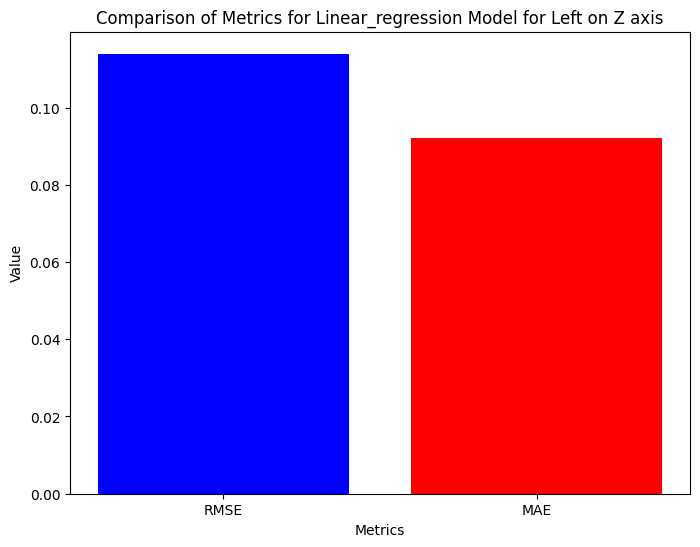

In [35]:
metrics = {
    #'MSE': score,
    'RMSE': L_Z_LR_rmse,
    'MAE': L_Z_LR_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Linear_regression Model for Left on Z axis')

# Show plot
plt.savefig('Linear_regression_Metrics_Bar_Plot_Left_Z.png')
plt.show()

### Predicting on Right

In [36]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
pred_R_X_LR = model.predict(X_test)
R_X_LR_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_LR))
R_X_LR_mae = mean_absolute_error(y_test_R_X, pred_R_X_LR)
print("RMSE for predicting step RIGHT on axis X:", R_X_LR_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_LR_mae)

MSE for predicting step R on axis X: 0.011982154056195293
RMSE for predicting step RIGHT on axis X: 0.051210657561278065
MAE for predicting step RIGHT on axis X: 0.03517374138629701


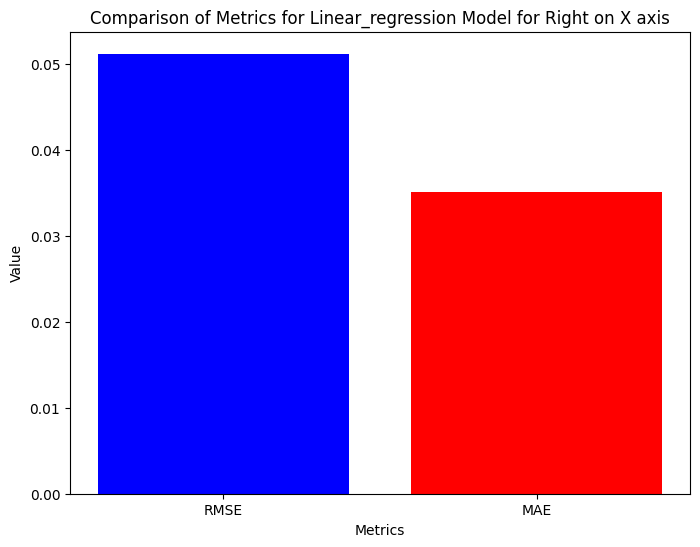

In [37]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_LR_rmse,
    'MAE': R_X_LR_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Linear_regression Model for Right on X axis')

# Show plot
plt.savefig('Linear_regression_Metrics_Bar_Plot_Right_X.png')
plt.show()

In [38]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
pred_R_Y_LR = model.predict(X_test)
R_Y_LR_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_LR))
R_Y_LR_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_LR)
print("RMSE for predicting step RIGHT on axis Y:", R_Y_LR_rmse)
print("MAE for predicting step RIGHT on axis Y:", R_Y_LR_mae)

MSE for predicting step R on axis Y: 0.5712583544715082
RMSE for predicting step RIGHT on axis Y: 0.5662337932997117
MAE for predicting step RIGHT on axis Y: 0.46742371716860454


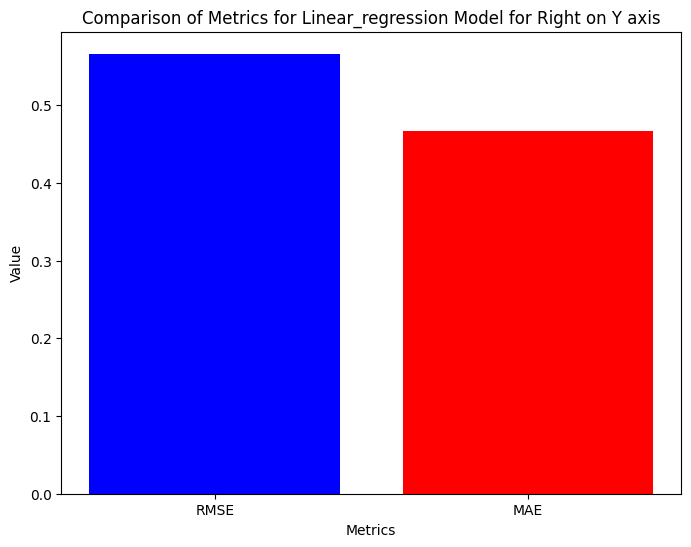

In [39]:
metrics = {
    #'MSE': score,
    'RMSE': R_Y_LR_rmse,
    'MAE': R_Y_LR_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Linear_regression Model for Right on Y axis')

# Show plot
plt.savefig('Linear_regression_Metrics_Bar_Plot_Right_Y.png')
plt.show()

In [40]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_LR = model.predict(X_test)
R_Z_LR_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_LR))
R_Z_LR_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_LR)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_LR_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_LR_mae)

MSE for predicting step R on axis Z: 0.2748723228123158
RMSE for predicting step RIGHT on axis Z: 0.11464482906940987
MAE for predicting step RIGHT on axis Z: 0.09251864439687825


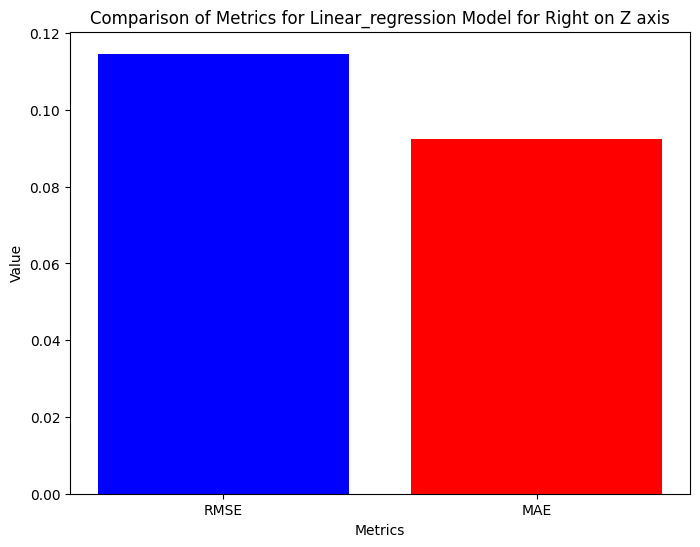

In [41]:
metrics = {
    #'MSE': score,
    'RMSE': R_Z_LR_rmse,
    'MAE': R_Z_LR_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Linear_regression Model for Right on Z axis')

# Show plot
plt.savefig('Linear_regression_Metrics_Bar_Plot_Right_Z.png')
plt.show()

## MLP regression (Multilayer Percptron regression)

### Predicting on Left

In [42]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Z": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = MLPRegressor(
    hidden_layer_sizes=(1, 5),
    alpha=0.1,
    early_stopping=False,
    max_iter=50
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
pred_L_X_MLP = model.predict(X_test)
L_X_MLP_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_MLP))
L_X_MLP_mae = mean_absolute_error(y_test_L_X, pred_L_X_MLP)
print("RMSE for predicting step LEFT on axis X:", L_X_MLP_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_MLP_mae)


MSE for predicting step L on axis X: -0.00023099624525024787
RMSE for predicting step LEFT on axis X: 0.05085156293194907
MAE for predicting step LEFT on axis X: 0.03505462241314724


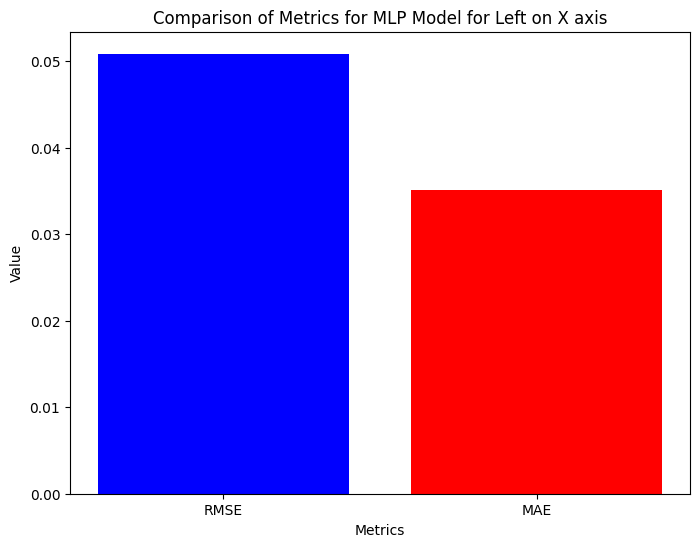

In [43]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_MLP_rmse,
    'MAE': L_X_MLP_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for MLP Model for Left on X axis')

# Show plot
plt.savefig('MLP_Metrics_Bar_Plot_Left_X.png')
plt.show()

In [44]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = MLPRegressor(
    hidden_layer_sizes=(1, 5),
    alpha=0.1,
    early_stopping=False,
    max_iter=50
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_MLP = model.predict(X_test)
L_Y_MLP_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_MLP))
L_Y_MLP_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_MLP)
print("RMSE for predicting step LEFT on axis Y:", L_Y_MLP_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_MLP_mae)

MSE for predicting step L on axis Y: 0.7466045130670704
RMSE for predicting step LEFT on axis Y: 0.5991161337650398
MAE for predicting step LEFT on axis Y: 0.48951265602758137


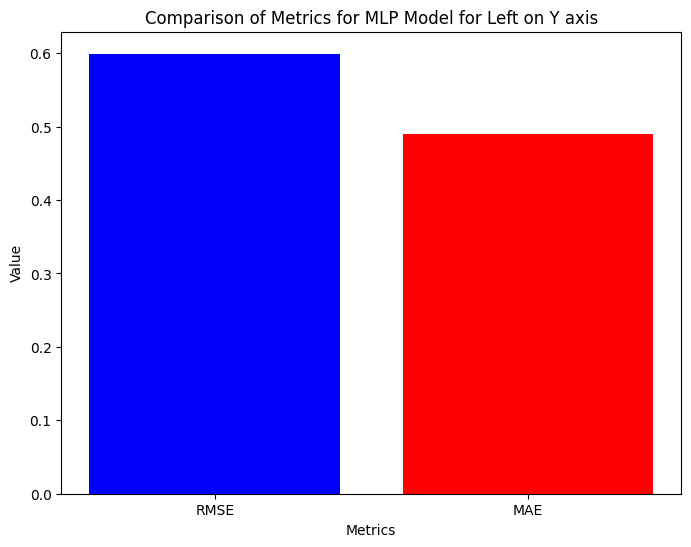

In [45]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_MLP_rmse,
    'MAE': L_Y_MLP_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for MLP Model for Left on Y axis')

# Show plot
plt.savefig('MLP_Metrics_Bar_Plot_Left_Y.png')
plt.show()

In [46]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = MLPRegressor(
    hidden_layer_sizes=(1, 5),
    alpha=0.1,
    early_stopping=False,
    max_iter=50
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_MLP = model.predict(X_test)
L_Z_MLP_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_MLP))
L_Z_MLP_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_MLP)
print("RMSE for predicting step LEFT on axis Z:", L_Z_MLP_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_MLP_mae)

MSE for predicting step L on axis Z: 0.6530440167819852
RMSE for predicting step LEFT on axis Z: 0.12981757932709637
MAE for predicting step LEFT on axis Z: 0.10649930689757822


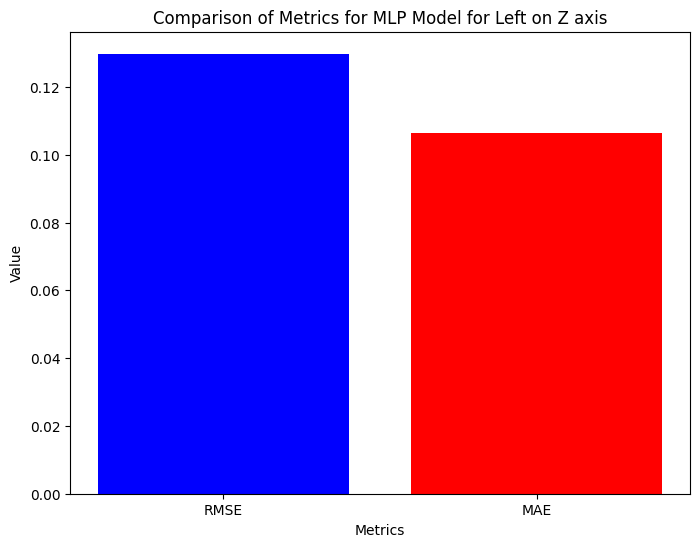

In [47]:
metrics = {
    #'MSE': score,
    'RMSE': L_Z_MLP_rmse,
    'MAE': L_Z_MLP_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for MLP Model for Left on Z axis')

# Show plot
plt.savefig('MLP_Metrics_Bar_Plot_Left_Z.png')
plt.show()

### Predicting on Right

In [48]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = MLPRegressor(
    hidden_layer_sizes=(1, 5),
    alpha=0.1,
    early_stopping=False,
    max_iter=50
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
pred_R_X_MLP = model.predict(X_test)
R_X_MLP_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_MLP))
R_X_MLP_mae = mean_absolute_error(y_test_R_X, pred_R_X_MLP)
print("RMSE for predicting step RIGHT on axis X:", R_X_MLP_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_MLP_mae)

MSE for predicting step R on axis X: 0.021379039570988745
RMSE for predicting step RIGHT on axis X: 0.05115960020456752
MAE for predicting step RIGHT on axis X: 0.03506670165313478


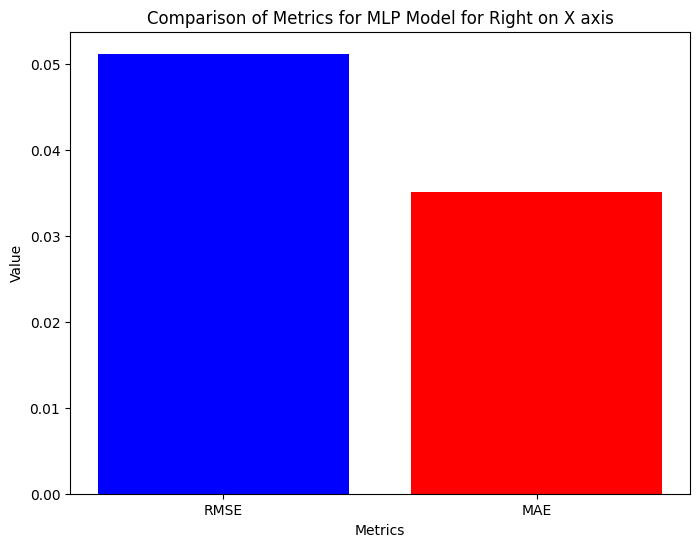

In [49]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_MLP_rmse,
    'MAE': R_X_MLP_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for MLP Model for Right on X axis')

# Show plot
plt.savefig('MLP_Metrics_Bar_Plot_Right_X.png')
plt.show()

In [50]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = MLPRegressor(
    hidden_layer_sizes=(1, 5),
    alpha=0.1,
    early_stopping=False,
    max_iter=50
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
pred_R_Y_MLP = model.predict(X_test)
R_Y_MLP_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_MLP))
R_Y_MLP_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_MLP)
print("RMSE for predicting step RIGHT on axis Y:", R_Y_MLP_rmse)
print("MAE for predicting step RIGHT on axis Y:", R_Y_MLP_mae)

MSE for predicting step R on axis Y: 0.7481021261952412
RMSE for predicting step RIGHT on axis Y: 0.6009664517407036
MAE for predicting step RIGHT on axis Y: 0.49093191069803943


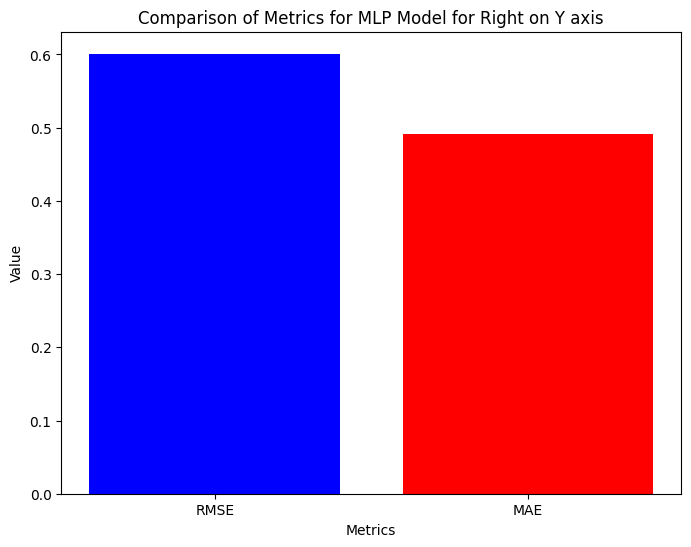

In [51]:
metrics = {
    #'MSE': score,
    'RMSE': R_Y_MLP_rmse,
    'MAE': R_Y_MLP_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for MLP Model for Right on Y axis')

# Show plot
plt.savefig('MLP_Metrics_Bar_Plot_Right_Y.png')
plt.show()

In [52]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = MLPRegressor(
    hidden_layer_sizes=(1, 5),
    alpha=0.1,
    early_stopping=False,
    max_iter=50
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_MLP = model.predict(X_test)
R_Z_MLP_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_MLP))
R_Z_MLP_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_MLP)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_MLP_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_MLP_mae)

MSE for predicting step R on axis Z: 0.7287078516870047
RMSE for predicting step RIGHT on axis Z: 0.1322467321574838
MAE for predicting step RIGHT on axis Z: 0.10772966680562565


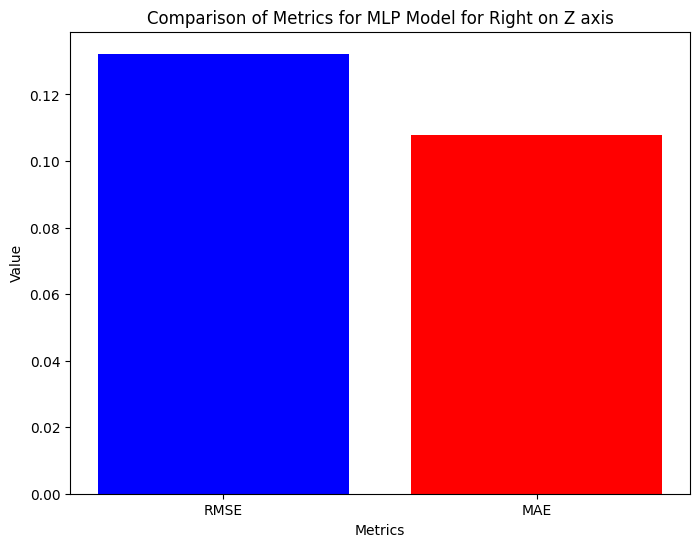

In [53]:
metrics = {
    #'MSE': score,
    'RMSE': R_Z_MLP_rmse,
    'MAE': R_Z_MLP_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for MLP Model for Right on Z axis')

# Show plot
plt.savefig('MLP_Metrics_Bar_Plot_Right_Z.png')
plt.show()

## Random Forest

### Predicting on Left

In [54]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = RandomForestRegressor(n_estimators=50)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
pred_L_X_RF = model.predict(X_test)
L_X_RF_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_RF))
L_X_RF_mae = mean_absolute_error(y_test_L_X, pred_L_X_RF)
print("RMSE for predicting step LEFT on axis X:", L_X_RF_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_RF_mae)

MSE for predicting step L on axis X: 0.3442533123008905
RMSE for predicting step LEFT on axis X: 0.06086397813779717
MAE for predicting step LEFT on axis X: 0.04376393107319548


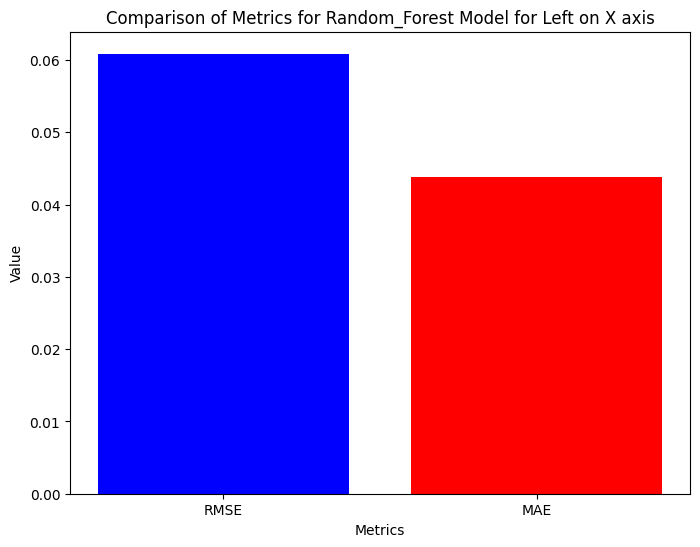

In [55]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_RF_rmse,
    'MAE': L_X_RF_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Random_Forest Model for Left on X axis')

# Show plot
plt.savefig('Random_Forest_Metrics_Bar_Plot_Left_X.png')
plt.show()

In [56]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = RandomForestRegressor(n_estimators=50)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_RF = model.predict(X_test)
L_Y_RF_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_RF))
L_Y_RF_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_RF)
print("RMSE for predicting step LEFT on axis Y:", L_Y_RF_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_RF_mae)

MSE for predicting step L on axis Y: 0.9049622326781679
RMSE for predicting step LEFT on axis Y: 0.6260707636959257
MAE for predicting step LEFT on axis Y: 0.5106169987928773


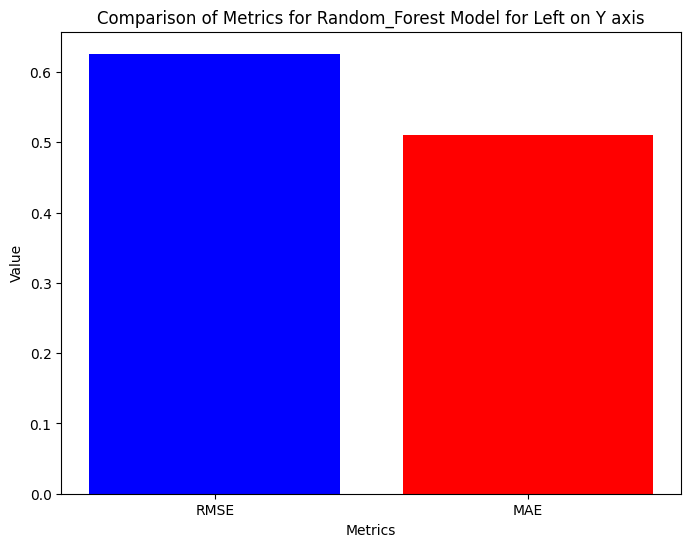

In [57]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_RF_rmse,
    'MAE': L_Y_RF_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Random_Forest Model for Left on Y axis')

# Show plot
plt.savefig('Random_Forest_Metrics_Bar_Plot_Left_Y.png')
plt.show()

In [58]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = RandomForestRegressor(n_estimators=50)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_RF = model.predict(X_test)
L_Z_RF_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_RF))
L_Z_RF_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_RF)
print("RMSE for predicting step LEFT on axis Z:", L_Z_RF_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_RF_mae)

MSE for predicting step L on axis Z: 0.9266077728922402
RMSE for predicting step LEFT on axis Z: 0.14132436998085782
MAE for predicting step LEFT on axis Z: 0.11453807350549586


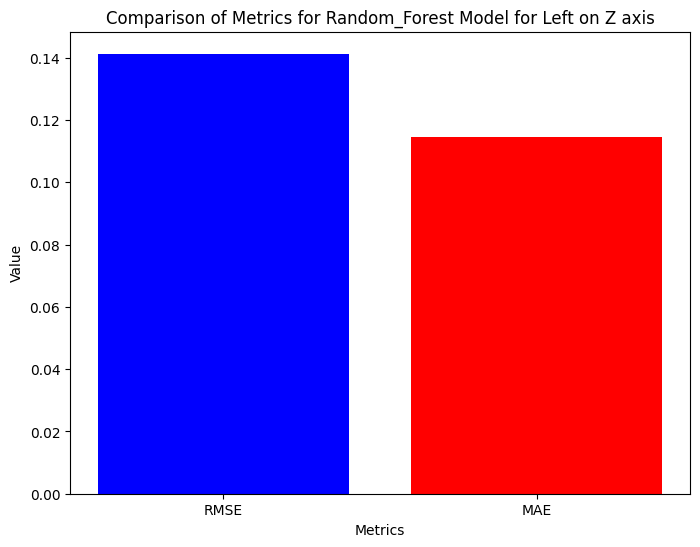

In [59]:
metrics = {
    #'MSE': score,
    'RMSE': L_Z_RF_rmse,
    'MAE': L_Z_RF_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Random_Forest Model for Left on Z axis')

# Show plot
plt.savefig('Random_Forest_Metrics_Bar_Plot_Left_Z.png')
plt.show()

### Predicting on Right

In [60]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = RandomForestRegressor(n_estimators=50)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
pred_R_X_RF = model.predict(X_test)
R_X_RF_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_RF))
R_X_RF_mae = mean_absolute_error(y_test_R_X, pred_R_X_RF)
print("RMSE for predicting step RIGHT on axis X:", R_X_RF_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_RF_mae)

MSE for predicting step R on axis X: 0.3331083932427754
RMSE for predicting step RIGHT on axis X: 0.06056510753695072
MAE for predicting step RIGHT on axis X: 0.043160618090386606


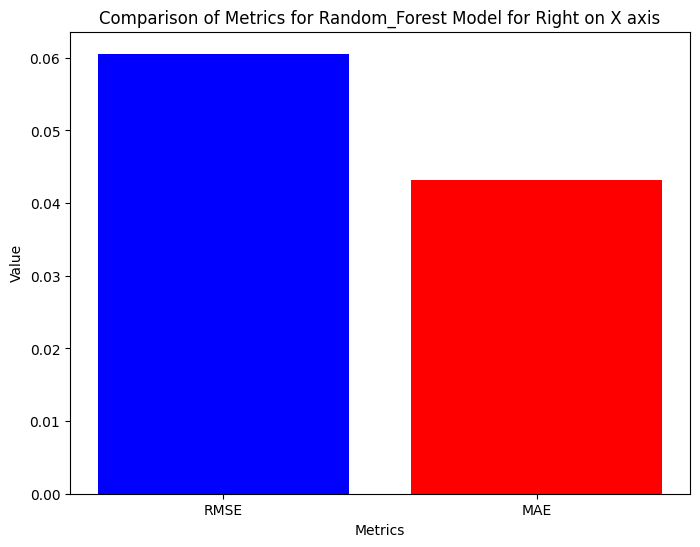

In [61]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_RF_rmse,
    'MAE': R_X_RF_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Random_Forest Model for Right on X axis')

# Show plot
plt.savefig('Random_Forest_Metrics_Bar_Plot_Right_X.png')
plt.show()

In [62]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = RandomForestRegressor(n_estimators=50)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
pred_R_Y_RF = model.predict(X_test)
R_Y_RF_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_RF))
R_Y_RF_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_RF)
print("RMSE for predicting step RIGHT on axis Y:", R_Y_RF_rmse)
print("MAE for predicting step RIGHT on axis Y:", R_Y_RF_mae)

MSE for predicting step R on axis Y: 0.9073068942609092
RMSE for predicting step RIGHT on axis Y: 0.6252980165666727
MAE for predicting step RIGHT on axis Y: 0.5099553606856766


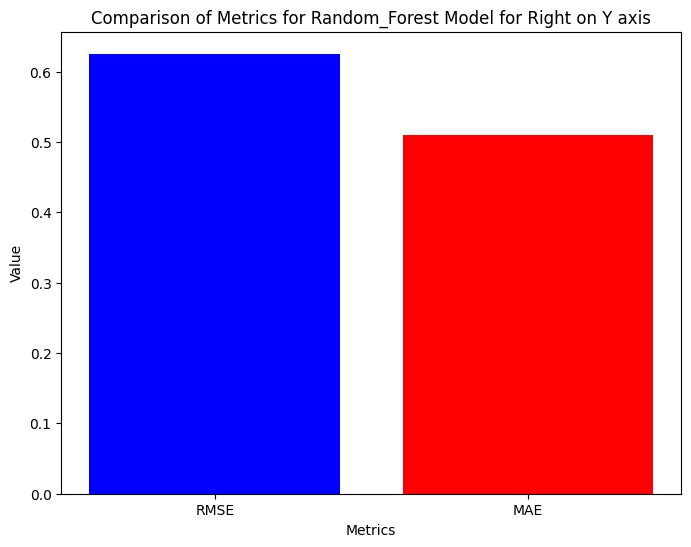

In [63]:
metrics = {
    #'MSE': score,
    'RMSE': R_Y_RF_rmse,
    'MAE': R_Y_RF_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Random_Forest Model for Right on Y axis')

# Show plot
plt.savefig('Random_Forest_Metrics_Bar_Plot_Right_Y.png')
plt.show()

In [64]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = RandomForestRegressor(n_estimators=50)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_RF = model.predict(X_test)
R_Z_RF_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_RF))
R_Z_RF_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_RF)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_RF_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_RF_mae)

MSE for predicting step R on axis Z: 0.9265759867068469
RMSE for predicting step RIGHT on axis Z: 0.14127579591627168
MAE for predicting step RIGHT on axis Z: 0.11454382160308264


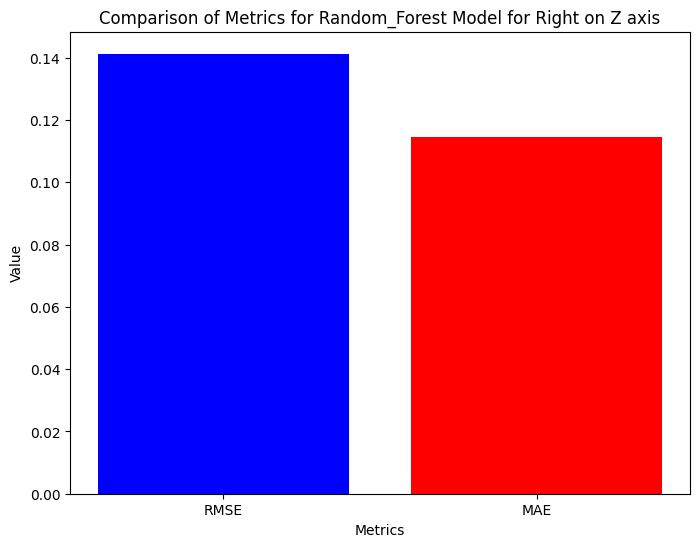

In [65]:
metrics = {
    #'MSE': score,
    'RMSE': R_Z_RF_rmse,
    'MAE': R_Z_RF_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for Random_Forest Model for Right on Z axis')

# Show plot
plt.savefig('Random_Forest_Metrics_Bar_Plot_Right_Z.png')
plt.show()

## CatBoost

### Predicting on Left

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = CatBoostRegressor(iterations=50,
                        learning_rate=0.1,
                        depth=10, random_seed=13, verbose=200)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
pred_L_X_CAT = model.predict(X_test)
L_X_CAT_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_CAT))
L_X_CAT_mae = mean_absolute_error(y_test_L_X, pred_L_X_CAT)
print("RMSE for predicting step LEFT on axis X:", L_X_CAT_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_CAT_mae)

In [ ]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = CatBoostRegressor(iterations=50,
                        learning_rate=0.1,
                        depth=10, random_seed=13, verbose=200)
# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_CAT = model.predict(X_test)
L_Y_CAT_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_CAT))
L_Y_CAT_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_CAT)
print("RMSE for predicting step LEFT on axis Y:", L_Y_CAT_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_CAT_mae)

In [ ]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = CatBoostRegressor(iterations=50,
                        learning_rate=0.1,
                        depth=10, random_seed=13, verbose=200)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_CAT = model.predict(X_test)
L_Z_CAT_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_CAT))
L_Z_CAT_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_CAT)
print("RMSE for predicting step LEFT on axis Z:", L_Z_CAT_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_CAT_mae)

### Predicting on Right

In [ ]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = CatBoostRegressor(iterations=50,
                        learning_rate=0.1,
                        depth=10, random_seed=13, verbose=200)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
pred_R_X_CAT = model.predict(X_test)
R_X_CAT_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_CAT))
R_X_CAT_mae = mean_absolute_error(y_test_R_X, pred_R_X_CAT)
print("RMSE for predicting step RIGHT on axis X:", R_X_CAT_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_CAT_mae)

In [ ]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = CatBoostRegressor(iterations=50,
                        learning_rate=0.1,
                        depth=10, random_seed=13, verbose=200)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
pred_R_Y_CAT = model.predict(X_test)
R_Y_CAT_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_CAT))
R_Y_CAT_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_CAT)
print("RMSE for predicting step RIGHT on axis Y:", R_Y_CAT_rmse)
print("MAE for predicting step RIGHT on axis Y:", R_Y_CAT_mae)

In [ ]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = CatBoostRegressor(iterations=50,
                        learning_rate=0.1,
                        depth=10, random_seed=13, verbose=200)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_CAT = model.predict(X_test)
R_Z_CAT_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_CAT))
R_Z_CAT_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_CAT)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_CAT_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_CAT_mae)

## XGBOOST

### Predicting on Left

In [66]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepL_X.csv with train colum     "LLML_ACC_X": flattened_col1,
#     "LLML_ACC_Y": flattened_col2,
#     "LLML_ACC_Z": flattened_col3, and label StepL_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepL_X.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis X:", score)
pred_L_X_XGB = model.predict(X_test)
L_X_XGB_rmse = np.sqrt(mean_squared_error(y_test_L_X, pred_L_X_XGB))
L_X_XGB_mae = mean_absolute_error(y_test_L_X, pred_L_X_XGB)
print("RMSE for predicting step LEFT on axis X:", L_X_XGB_rmse)
print("MAE for predicting step LEFT on axis X:", L_X_XGB_mae)

MSE for predicting step L on axis X: 0.17665959331996883
RMSE for predicting step LEFT on axis X: 0.05367597992981977
MAE for predicting step LEFT on axis X: 0.03769782702849805


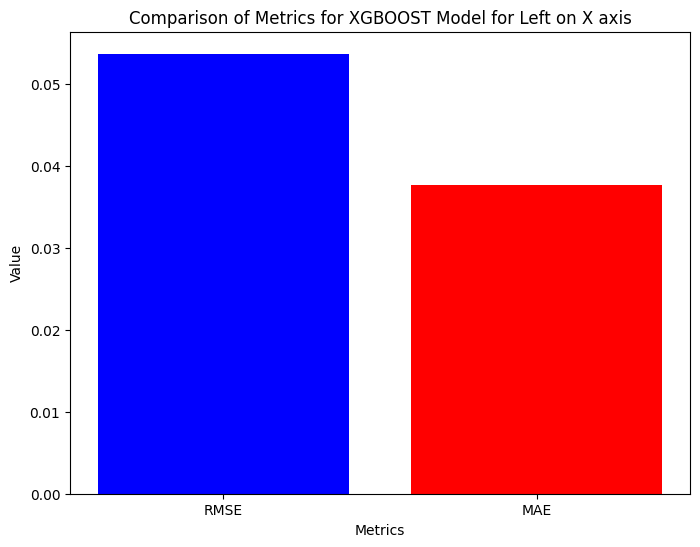

In [67]:
metrics = {
    #'MSE': score,
    'RMSE': L_X_XGB_rmse,
    'MAE': L_X_XGB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for XGBOOST Model for Left on X axis')

# Show plot
plt.savefig('XGBOOST_Metrics_Bar_Plot_Left_X.png')
plt.show()

In [68]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Y.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Y:", score)
pred_L_Y_XGB = model.predict(X_test)
L_Y_XGB_rmse = np.sqrt(mean_squared_error(y_test_L_Y, pred_L_Y_XGB))
L_Y_XGB_mae = mean_absolute_error(y_test_L_Y, pred_L_Y_XGB)
print("RMSE for predicting step LEFT on axis Y:", L_Y_XGB_rmse)
print("MAE for predicting step LEFT on axis Y:", L_Y_XGB_mae)

MSE for predicting step L on axis Y: 0.8721113335127567
RMSE for predicting step LEFT on axis Y: 0.6094753454403091
MAE for predicting step LEFT on axis Y: 0.49741037821989975


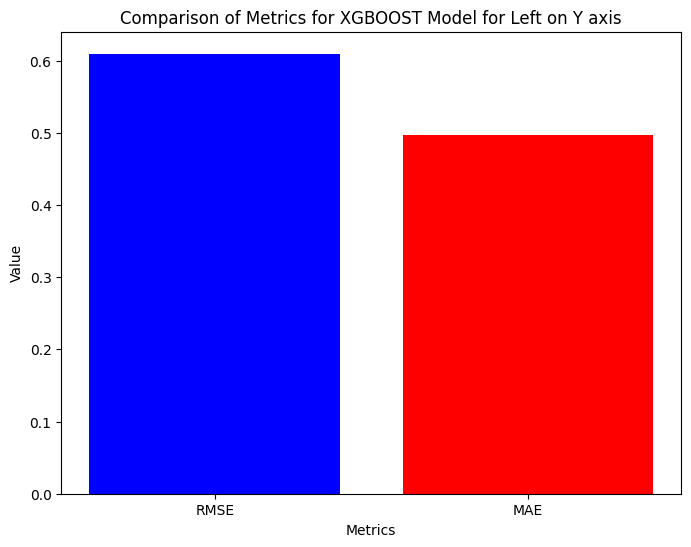

In [69]:
metrics = {
    #'MSE': score,
    'RMSE': L_Y_XGB_rmse,
    'MAE': L_Y_XGB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for XGBOOST Model for Left on Y axis')

# Show plot
plt.savefig('XGBOOST_Metrics_Bar_Plot_Left_Y.png')
plt.show()

In [70]:
# Load the data
data = pd.read_csv("data/output/Combined_StepL_Z.csv")

# Separate features and labels
features = data[["LLML_ACC_X", "LLML_ACC_Y", "LLML_ACC_Z"]]
labels = data["StepL_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step L on axis Z:", score)
pred_L_Z_XGB = model.predict(X_test)
L_Z_XGB_rmse = np.sqrt(mean_squared_error(y_test_L_Z, pred_L_Z_XGB))
L_Z_XGB_mae = mean_absolute_error(y_test_L_Z, pred_L_Z_XGB)
print("RMSE for predicting step LEFT on axis Z:", L_Z_XGB_rmse)
print("MAE for predicting step LEFT on axis Z:", L_Z_XGB_mae)

MSE for predicting step L on axis Z: 0.8998843511871554
RMSE for predicting step LEFT on axis Z: 0.13900853989303644
MAE for predicting step LEFT on axis Z: 0.11284792286148791


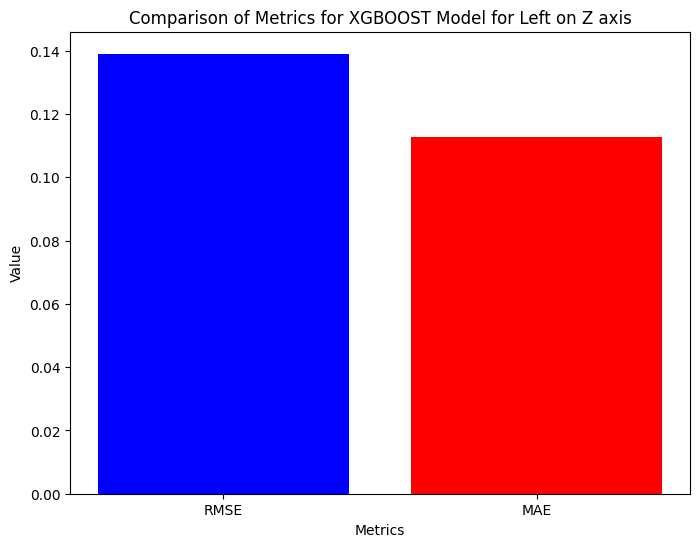

In [71]:
metrics = {
    #'MSE': score,
    'RMSE': L_Z_XGB_rmse,
    'MAE': L_Z_XGB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for XGBOOST Model for Left on Z axis')

# Show plot
plt.savefig('XGBOOST_Metrics_Bar_Plot_Left_Z.png')
plt.show()

### Predicting on Right

In [72]:
# prompt: write a simple rbinary tree model for regression to be trained on Combined_StepR_X.csv with train colum     "RLML_ACC_X": flattened_col1,
#     "RLML_ACC_Y": flattened_col2,
#     "RLML_ACC_Z": flattened_col3, and label StepR_X column, split data on train and test


# Load the data
data = pd.read_csv("data/output/Combined_StepR_X.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_X"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis X:", score)
pred_R_X_XGB = model.predict(X_test)
R_X_XGB_rmse = np.sqrt(mean_squared_error(y_test_R_X, pred_R_X_XGB))
R_X_XGB_mae = mean_absolute_error(y_test_R_X, pred_R_X_XGB)
print("RMSE for predicting step RIGHT on axis X:", R_X_XGB_rmse)
print("MAE for predicting step RIGHT on axis X:", R_X_XGB_mae)

MSE for predicting step R on axis X: 0.16351665861542808
RMSE for predicting step RIGHT on axis X: 0.05350154833437915
MAE for predicting step RIGHT on axis X: 0.03723434285762436


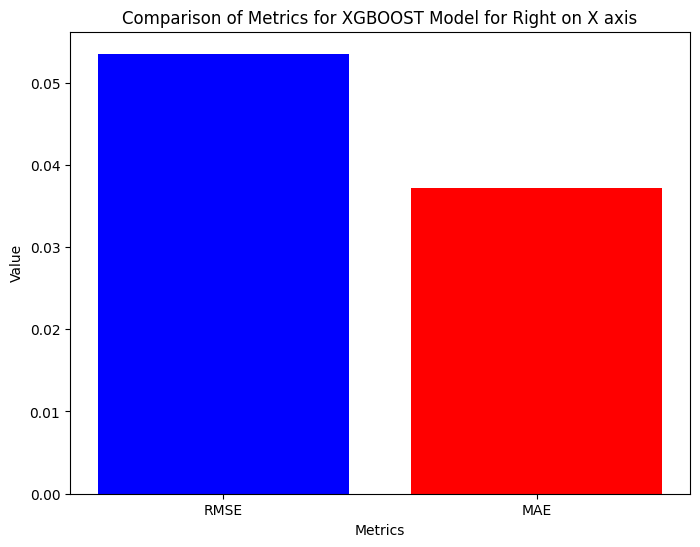

In [73]:
metrics = {
    #'MSE': score,
    'RMSE': R_X_XGB_rmse,
    'MAE': R_X_XGB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for XGBOOST Model for Right on X axis')

# Show plot
plt.savefig('XGBOOST_Metrics_Bar_Plot_Right_X.png')
plt.show()

In [74]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Y.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Y"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Y:", score)
pred_R_Y_XGB = model.predict(X_test)
R_Y_XGB_rmse = np.sqrt(mean_squared_error(y_test_R_Y, pred_R_Y_XGB))
R_Y_XGB_mae = mean_absolute_error(y_test_R_Y, pred_R_Y_XGB)
print("RMSE for predicting step RIGHT on axis Y:", R_Y_XGB_rmse)
print("MAE for predicting step RIGHT on axis Y:", R_Y_XGB_mae)

MSE for predicting step R on axis Y: 0.875547521133943
RMSE for predicting step RIGHT on axis Y: 0.61005731451234
MAE for predicting step RIGHT on axis Y: 0.49788902791889006


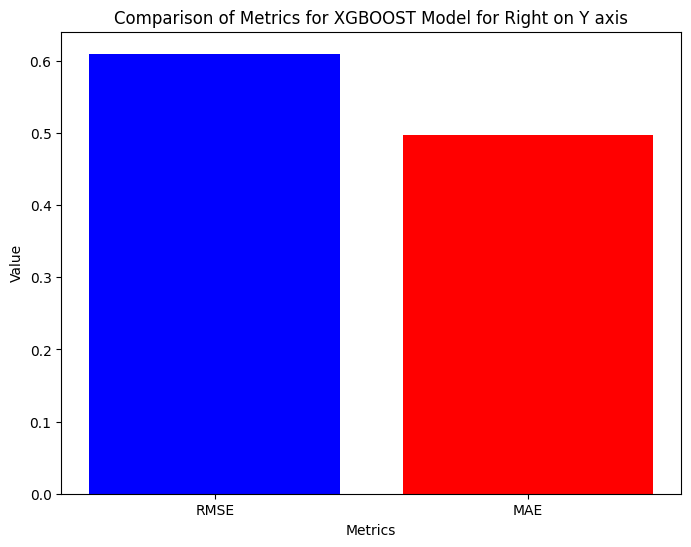

In [75]:
metrics = {
    #'MSE': score,
    'RMSE': R_Y_XGB_rmse,
    'MAE': R_Y_XGB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for XGBOOST Model for Right on Y axis')

# Show plot
plt.savefig('XGBOOST_Metrics_Bar_Plot_Right_Y.png')
plt.show()

In [76]:
# Load the data
data = pd.read_csv("data/output/Combined_StepR_Z.csv")

# Separate features and labels
features = data[["RLML_ACC_X", "RLML_ACC_Y", "RLML_ACC_Z"]]
labels = data["StepR_Z"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Create a decision tree regressor model
model = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("MSE for predicting step R on axis Z:", score)
pred_R_Z_XGB = model.predict(X_test)
R_Z_XGB_rmse = np.sqrt(mean_squared_error(y_test_R_Z, pred_R_Z_XGB))
R_Z_XGB_mae = mean_absolute_error(y_test_R_Z, pred_R_Z_XGB)
print("RMSE for predicting step RIGHT on axis Z:", R_Z_XGB_rmse)
print("MAE for predicting step RIGHT on axis Z:", R_Z_XGB_mae)

MSE for predicting step R on axis Z: 0.9027871498592959
RMSE for predicting step RIGHT on axis Z: 0.13891030947194363
MAE for predicting step RIGHT on axis Z: 0.11268586810173699


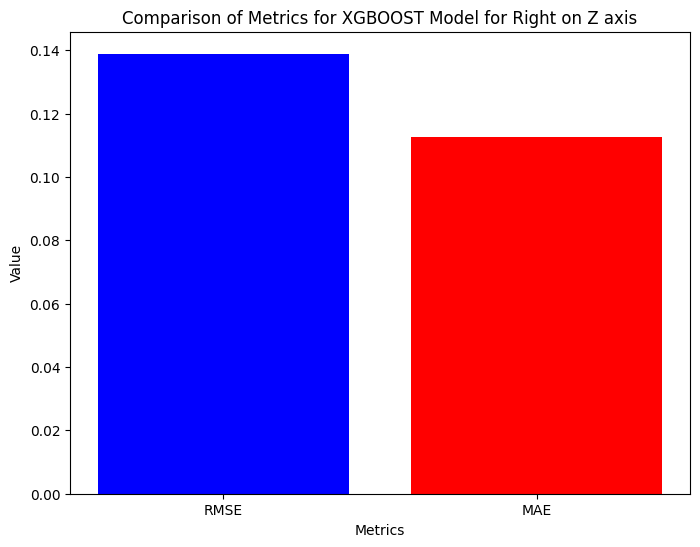

In [77]:
metrics = {
    #'MSE': score,
    'RMSE': R_Z_XGB_rmse,
    'MAE': R_Z_XGB_mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))

# Bar plot
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics for XGBOOST Model for Right on Z axis')

# Show plot
plt.savefig('XGBOOST_Metrics_Bar_Plot_Right_Z.png')
plt.show()

# Plots

## KDE PLOT

In [ ]:
# prompt: write kdeplot (actual ws pred distribution), to plot, y_test, with prediction of mulitple model, pred_nn, pred, forest, pred_cat, pred_xgb and save it to a file
# LEFT X

import seaborn as sns
import matplotlib.pyplot as plt

# Define distinct colors for each plot
colors = {
    'Step Left X': 'blue',
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Elastic Net': '#e7c505',
    'LASSO': '#7F7F7F',  # Changed to distinguish from Elastic Net
    'Linear Regression': '#FF6F61',  # Changed to distinguish from Elastic Net
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#17becf'  # Teal
}

# Plot KDEs with distinct colors
sns.kdeplot(y_test_L_X, label='Step Left X', shade=False, color=colors['Step Left X'])
sns.kdeplot(pred_L_X_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
sns.kdeplot(pred_L_X_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
# sns.kdeplot(pred_L_X_ENR, label='Elastic Net', shade=False, color=colors['Elastic Net'])
# sns.kdeplot(pred_L_X_LASSO, label='LASSO', shade=False, color=colors['LASSO'])
sns.kdeplot(pred_L_X_LR, label='Linear Regression', shade=False, color=colors['Linear Regression'])
sns.kdeplot(pred_L_X_MLP, label='MLP', shade=False, color=colors['MLP'])
sns.kdeplot(pred_L_X_RF, label='Random Forest', shade=False, color=colors['Random Forest'])
sns.kdeplot(pred_L_X_GB, label='XGBoost', shade=False, color=colors['XGBoost'])  # Replacing with 'XGBoost' for clarity

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Distributions')
plt.legend()
plt.savefig('LEFT_X_kdeplot.png')
plt.show()



In [ ]:
# LEFT Y

import seaborn as sns
import matplotlib.pyplot as plt

# Define distinct colors for each plot
colors = {
    'Step Left Y': 'blue',
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#17becf'  # Teal
}

# Plot KDEs with distinct colors
sns.kdeplot(y_test_L_Y, label='Step Left Y', shade=False, color=colors['Step Left Y'])
sns.kdeplot(pred_L_Y_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
sns.kdeplot(pred_L_Y_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
sns.kdeplot(pred_L_Y_LR, label='Linear Regression', shade=False, color=colors['Linear Regression'])
sns.kdeplot(pred_L_Y_MLP, label='MLP', shade=False, color=colors['MLP'])
sns.kdeplot(pred_L_Y_RF, label='Random Forest', shade=False, color=colors['Random Forest'])
sns.kdeplot(pred_L_Y_GB, label='XGBoost', shade=False, color=colors['XGBoost'])  # Replacing with 'XGBoost' for clarity

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Distributions')
plt.legend()
plt.savefig('LEFT_Y_kdeplot.png')
plt.show()


In [ ]:
# LEFT Z

import seaborn as sns
import matplotlib.pyplot as plt

# Define distinct colors for each plot
colors = {
    'Step Left Z': 'blue',
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf'  # Greenish color for XGBoost
}

# Plot KDEs with distinct colors
sns.kdeplot(y_test_L_Z, label='Step Left Z', shade=False, color=colors['Step Left Z'])
sns.kdeplot(pred_L_Z_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
sns.kdeplot(pred_L_Z_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
sns.kdeplot(pred_L_Z_LR, label='Linear Regression', shade=False, color=colors['Linear Regression'])
sns.kdeplot(pred_L_Z_MLP, label='MLP', shade=False, color=colors['MLP'])
sns.kdeplot(pred_L_Z_RF, label='Random Forest', shade=False, color=colors['Random Forest'])
sns.kdeplot(pred_L_Z_ZGB, label='XGBoost', shade=False, color=colors['XGBoost'])

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Distributions')
plt.legend()
plt.savefig('LEFT_Z_kdeplot.png')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define distinct colors for each plot
colors = {
    'Step Right X': 'blue',
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf'  # Greenish color for XGBoost
}

# Plot KDEs with distinct colors
sns.kdeplot(y_test_R_X, label='Step Right X', shade=False, color=colors['Step Right X'])
sns.kdeplot(pred_R_X_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
sns.kdeplot(pred_R_X_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
sns.kdeplot(pred_R_X_LR, label='Linear Regression', shade=False, color=colors['Linear Regression'])
sns.kdeplot(pred_R_X_MLP, label='MLP', shade=False, color=colors['MLP'])
sns.kdeplot(pred_R_X_RF, label='Random Forest', shade=False, color=colors['Random Forest'])
sns.kdeplot(pred_R_X_XGB, label='XGBoost', shade=False, color=colors['XGBoost'])

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Distributions')
plt.legend()
plt.savefig('right_X_kdeplot.png')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define distinct colors for each plot
colors = {
    'Step Right Y': 'blue',
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf'  # Greenish color for XGBoost
}

# Plot KDEs with distinct colors
sns.kdeplot(y_test_R_Y, label='Step Right Y', shade=False, color=colors['Step Right Y'])
sns.kdeplot(pred_R_Y_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
sns.kdeplot(pred_R_Y_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
sns.kdeplot(pred_R_Y_LR, label='Linear Regression', shade=False, color=colors['Linear Regression'])
sns.kdeplot(pred_R_Y_MLP, label='MLP', shade=False, color=colors['MLP'])
sns.kdeplot(pred_R_Y_RF, label='Random Forest', shade=False, color=colors['Random Forest'])
sns.kdeplot(pred_R_Y_GB, label='XGBoost', shade=False, color=colors['XGBoost'])  # Make sure the label is correct

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Distributions')
plt.legend()
plt.savefig('right_Y_kdeplot.png')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define distinct colors for each plot
colors = {
    'Step Right Z': 'blue',
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf'  # Greenish color for XGBoost
}

# Plot KDEs with distinct colors
sns.kdeplot(y_test_R_Z, label='Step Right Z', shade=False, color=colors['Step Right Z'])
sns.kdeplot(pred_R_Z_DT, label='Decision Tree', shade=False, color=colors['Decision Tree'])
sns.kdeplot(pred_R_Z_GB, label='Gradient Boosting', shade=False, color=colors['Gradient Boosting'])
sns.kdeplot(pred_R_Z_LR, label='Linear Regression', shade=False, color=colors['Linear Regression'])
sns.kdeplot(pred_R_Z_MLP, label='MLP', shade=False, color=colors['MLP'])
sns.kdeplot(pred_R_Z_RF, label='Random Forest', shade=False, color=colors['Random Forest'])
sns.kdeplot(pred_R_Z_XGB, label='XGBoost', shade=False, color=colors['XGBoost'])  # Make sure the label is correct

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Distributions')
plt.legend()
plt.savefig('RIGHT_Z_kdeplot.png')
plt.show()


## Scatter Plot

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define distinct colors for each scatter plot
colors = {
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf'  # Greenish color for XGBoost
}

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter plots with distinct colors
ax.scatter(xs=y_test_L_X, ys=pred_L_X_DT, zs=[1]*len(y_test_L_X), label='Decision Tree', color=colors['Decision Tree'])
ax.scatter(xs=y_test_L_X, ys=pred_L_X_GB, zs=[2]*len(y_test_L_X), label='Gradient Boosting', color=colors['Gradient Boosting'])
ax.scatter(xs=y_test_L_X, ys=pred_L_X_LR, zs=[3]*len(y_test_L_X), label='Linear Regression', color=colors['Linear Regression'])
ax.scatter(xs=y_test_L_X, ys=pred_L_X_MLP, zs=[4]*len(y_test_L_X), label='MLP', color=colors['MLP'])
ax.scatter(xs=y_test_L_X, ys=pred_L_X_RF, zs=[5]*len(y_test_L_X), label='Random Forest', color=colors['Random Forest'])
ax.scatter(xs=y_test_L_X, ys=pred_L_X_XGB, zs=[6]*len(y_test_L_X), label='XGBoost', color=colors['XGBoost'])

# Set labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('Model Index')
ax.set_title('3D Scatter Plot of Actual vs. Predicted Values')

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('LEFT_X_3D_scatter.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define distinct colors for each scatter plot
colors = {
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf'  # Greenish color for XGBoost
}

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter plots with distinct colors
ax.scatter(xs=y_test_L_Y, ys=pred_L_Y_DT, zs=[1]*len(y_test_L_Y), label='Decision Tree', color=colors['Decision Tree'])
ax.scatter(xs=y_test_L_Y, ys=pred_L_Y_GB, zs=[2]*len(y_test_L_Y), label='Gradient Boosting', color=colors['Gradient Boosting'])
ax.scatter(xs=y_test_L_Y, ys=pred_L_Y_LR, zs=[3]*len(y_test_L_Y), label='Linear Regression', color=colors['Linear Regression'])
ax.scatter(xs=y_test_L_Y, ys=pred_L_Y_MLP, zs=[4]*len(y_test_L_Y), label='MLP', color=colors['MLP'])
ax.scatter(xs=y_test_L_Y, ys=pred_L_Y_RF, zs=[5]*len(y_test_L_Y), label='Random Forest', color=colors['Random Forest'])
ax.scatter(xs=y_test_L_Y, ys=pred_L_Y_XGB, zs=[6]*len(y_test_L_Y), label='XGBoost', color=colors['XGBoost'])  # Fixed label for XGBoost

# Set labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('Model Index')
ax.set_title('3D Scatter Plot of Actual vs. Predicted Values')

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('LEFT_Y_3D_scatter.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define distinct colors for each scatter plot
colors = {
    'Decision Tree': 'black',
    'Gradient Boosting': 'red',
    'Elastic Net': '#e7c505',
    'MLP': '#1f77b4',  # Different shade of blue
    'Random Forest': '#2ca02c',  # Green
    'XGBoost': '#cf17cf'  # Greenish color for XGBoost
}

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter plots with distinct colors
ax.scatter(xs=y_test_L_Z, ys=pred_L_Z_DT, zs=[1]*len(y_test_L_Z), label='Decision Tree', color=colors['Decision Tree'])
ax.scatter(xs=y_test_L_Z, ys=pred_L_Z_GB, zs=[2]*len(y_test_L_Z), label='Gradient Boosting', color=colors['Gradient Boosting'])
ax.scatter(xs=y_test_L_Z, ys=pred_L_Z_ENR, zs=[3]*len(y_test_L_Z), label='Elastic Net', color=colors['Elastic Net'])
ax.scatter(xs=y_test_L_Z, ys=pred_L_Z_MLP, zs=[4]*len(y_test_L_Z), label='MLP', color=colors['MLP'])
ax.scatter(xs=y_test_L_Z, ys=pred_L_Z_RF, zs=[5]*len(y_test_L_Z), label='Random Forest', color=colors['Random Forest'])
ax.scatter(xs=y_test_L_Z, ys=pred_L_Z_XGB, zs=[6]*len(y_test_L_Z), label='XGBoost', color=colors['XGBoost'])

# Set labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('Model Index')
ax.set_title('3D Scatter Plot of Actual vs. Predicted Values')

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('LEFT_Z_3D_scatter.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define distinct colors for each scatter plot
colors = {
    'Decision Tree': '#000000',  # Black
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',  # Yellowish
    'MLP': '#000000',  # Black
    'Random Forest': '#000000',  # Black
    'XGBoost': '#cf17cf'  # Greenish
}

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter plots with distinct colors
ax.scatter(xs=y_test_R_X, ys=pred_R_X_DT, zs=[1]*len(y_test_R_X), label='Decision Tree', color=colors['Decision Tree'])
ax.scatter(xs=y_test_R_X, ys=pred_R_X_GB, zs=[2]*len(y_test_R_X), label='Gradient Boosting', color=colors['Gradient Boosting'])
# ax.scatter(xs=y_test_R_X, ys=pred_R_X_ENR, zs=[3]*len(y_test_R_X), label='Elastic Net', color=colors['Elastic Net'])
# ax.scatter(xs=y_test_R_X, ys=pred_R_X_LASSO, zs=[4]*len(y_test_R_X), label='LASSO', color=colors['LASSO'])
ax.scatter(xs=y_test_R_X, ys=pred_R_X_LR, zs=[5]*len(y_test_R_X), label='Linear Regression', color=colors['Linear Regression'])
ax.scatter(xs=y_test_R_X, ys=pred_R_X_MLP, zs=[6]*len(y_test_R_X), label='MLP', color=colors['MLP'])
ax.scatter(xs=y_test_R_X, ys=pred_R_X_RF, zs=[7]*len(y_test_R_X), label='Random Forest', color=colors['Random Forest'])
# ax.scatter(xs=y_test_R_X, ys=pred_R_X_CAT, zs=[8]*len(y_test_R_X), label='Catboost', color=colors['Catboost'])
ax.scatter(xs=y_test_R_X, ys=pred_R_X_XGB, zs=[9]*len(y_test_R_X), label='XGBoost', color=colors['XGBoost'])

# Set labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('Model Index')
ax.set_title('3D Scatter Plot of Actual vs. Predicted Values')

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('RIGHT_X_3D_scatter.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define distinct colors for each scatter plot
colors = {
    'Decision Tree': '#000000',  # Black
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',  # Yellowish
    'MLP': '#000000',  # Black
    'Random Forest': '#000000',  # Black
    'XGBoost': '#cf17cf'  # Greenish
}

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter plots with distinct colors
ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_DT, zs=[1]*len(y_test_R_Y), label='Decision Tree', color=colors['Decision Tree'])
ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_GB, zs=[2]*len(y_test_R_Y), label='Gradient Boosting', color=colors['Gradient Boosting'])
# ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_ENR, zs=[3]*len(y_test_R_Y), label='Elastic Net', color=colors['Elastic Net'])
# ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_LASSO, zs=[4]*len(y_test_R_Y), label='LASSO', color=colors['LASSO'])
ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_LR, zs=[5]*len(y_test_R_Y), label='Linear Regression', color=colors['Linear Regression'])
ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_MLP, zs=[6]*len(y_test_R_Y), label='MLP', color=colors['MLP'])
ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_RF, zs=[7]*len(y_test_R_Y), label='Random Forest', color=colors['Random Forest'])
# ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_CAT, zs=[8]*len(y_test_R_Y), label='Catboost', color=colors['Catboost'])
ax.scatter(xs=y_test_R_Y, ys=pred_R_Y_XGB, zs=[9]*len(y_test_R_Y), label='XGBoost', color=colors['XGBoost'])

# Set labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('Model Index')
ax.set_title('3D Scatter Plot of Actual vs. Predicted Values')

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('RIGHT_Y_3D_scatter.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define distinct colors for each scatter plot
colors = {
    'Decision Tree': '#000000',  # Black
    'Gradient Boosting': 'red',
    'Linear Regression': '#e7c505',  # Yellowish
    'MLP': '#000000',  # Black
    'Random Forest': '#000000',  # Black
    'XGBoost': '#cf17cf'  # Greenish
}

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter plots with distinct colors
ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_DT, zs=[1]*len(y_test_R_Z), label='Decision Tree', color=colors['Decision Tree'])
ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_GB, zs=[2]*len(y_test_R_Z), label='Gradient Boosting', color=colors['Gradient Boosting'])
# ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_ENR, zs=[3]*len(y_test_R_Z), label='Elastic Net', color=colors['Elastic Net'])
# ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_LASSO, zs=[4]*len(y_test_R_Z), label='LASSO', color=colors['LASSO'])
ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_LR, zs=[5]*len(y_test_R_Z), label='Linear Regression', color=colors['Linear Regression'])
ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_MLP, zs=[6]*len(y_test_R_Z), label='MLP', color=colors['MLP'])
ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_RF, zs=[7]*len(y_test_R_Z), label='Random Forest', color=colors['Random Forest'])
# ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_CAT, zs=[8]*len(y_test_R_Z), label='Catboost', color=colors['Catboost'])
ax.scatter(xs=y_test_R_Z, ys=pred_R_Z_XGB, zs=[9]*len(y_test_R_Z), label='XGBoost', color=colors['XGBoost'])

# Set labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_zlabel('Model Index')
ax.set_title('3D Scatter Plot of Actual vs. Predicted Values')

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('RIGHT_Z_3D_scatter.png')
plt.show()


In [ ]:
# prompt: modify this scatter plot, to plot, y_test, with prediction of mulitple model, pred_nn, pred, forest, pred_cat, pred_xgb:

plt.scatter(y_test, pred_nn, alpha=0.5, label='MLP')
# plt.scatter(y_test, pred, alpha=0.5, label='LSTM')
plt.scatter(y_test, pred_forest, alpha=0.5, label='RF')
plt.scatter(y_test, pred_cat, alpha=0.5, label='CatBoost')
plt.scatter(y_test, pred_xgb, alpha=0.5, label='XGBoost')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()